In [43]:
list_not_on_cloud 

['CanESM5-1',
 'UKESM1-1-LL',
 'IPSL-CM6A-MR1',
 'E3SM-2-0',
 'E3SM-2-0-NARRM',
 'MIROC-ES2H']

In [48]:
list_not_on_cloud_so

['CanESM5-1',
 'UKESM1-1-LL',
 'IPSL-CM6A-MR1',
 'E3SM-2-0',
 'E3SM-2-0-NARRM',
 'MIROC-ES2H']

In [1]:
# filter some warning messages
import warnings
warnings.filterwarnings("ignore")

In [2]:
from myfunctions import *

In [3]:
datapd = pd.read_csv('List_model.csv')

In [20]:
import scipy.stats

In [4]:
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import matplotlib.colors as mc
from matplotlib import cm
from matplotlib.patches import Rectangle
from matplotlib.ticker import FuncFormatter

import cartopy.crs as ccrs
import cartopy.feature as cfeature

import cmocean
import colorsys

from adjustText import adjust_text

In [5]:
# new color from https://colorbrewer2.org/
colors = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#d9d9d9','#fdb462','#fccde5','#b3de69','#80b1d3','#bc80bd','#ccebc5']
# colors = cm.get_cmap("Set3").colors
types = datapd['type'].unique()
color_dict = {}
if len(colors) >= len(types):
    print('create new color dict')
    for i in range(len(types)):
        color_dict[types[i]] = colors[i] #lighten_color(colors[i], 0.6)

create new color dict


In [13]:
selected_month = 9

for i in range(0, len(datapd)):
    name = datapd.at[i, 'source_id']

    print("{} {}".format(i, name), end = '...')
    if ispickleexists(name, '../../SO_data/data_sst_mean_55/'):
        print('exist.')
        continue

    if pd.isna(datapd.at[i, 'zstore_tos']):
        if pd.isna(datapd.at[i, 'zstore_thetao']):
            print(" [X] No tempdata on cloud. ")
            continue
        else:
            ds = open_from_cloud(datapd.at[i, 'zstore_thetao'])
            dat = ds.thetao.isel({datapd.at[i, 'zname']:0})
            print('loading thetao data', end = '...')
    else:
        ds = open_from_cloud(datapd.at[i, 'zstore_tos'])
        dat = ds.tos
        print('loading tos data', end = '...')
    dat_sep = select_month(dat, selected_month)
    
    newlatlon = None
    if name == 'CAS-ESM2-0':
        newlatlon = ('lat', 'lon')
    dlat, __ = get_latlon(datapd.iloc[i], dat_sep, newlatlon = newlatlon)
    dat_sep_south = dat_sep.where(dlat<=-55)
    dat_mean = dat_sep_south.mean(dim = (dat_sep_south.dims[-1], dat_sep_south.dims[-2]))
    dat_mean.load()

    savepickle(name, '../../SO_data/data_sst_mean_55/', dat_mean)
    print('done')

0 CAMS-CSM1-0...exist.
1 BCC-CSM2-MR...exist.
2 BCC-ESM1...exist.
3 KIOST-ESM...exist.
4 ACCESS-ESM1-5...exist.
5 ACCESS-CM2...exist.
6 GFDL-CM4...exist.
7 GFDL-ESM4...exist.
8 TaiESM1...exist.
9 SAM0-UNICON...exist.
10 CIESM...exist.
11 CESM2...exist.
12 CESM2-FV2...exist.
13 CESM2-WACCM...exist.
14 CESM2-WACCM-FV2...exist.
15 INM-CM4-8...exist.
16 NESM3...exist.
17 CanESM5...exist.
18 CanESM5-1... [X] No tempdata on cloud. 
19 CanESM5-CanOE...exist.
20 CMCC-CM2-SR5...exist.
21 CMCC-ESM2...exist.
22 EC-Earth3...exist.
23 EC-Earth3-CC...exist.
24 EC-Earth3-LR...exist.
25 EC-Earth3-Veg...exist.
26 EC-Earth3-Veg-LR...exist.
27 EC-Earth3-AerChem...exist.
28 CNRM-CM6-1...exist.
29 CNRM-CM6-1-HR...exist.
30 CNRM-ESM2-1...exist.
31 HadGEM3-GC31-LL...exist.
32 HadGEM3-GC31-MM...exist.
33 UKESM1-0-LL...exist.
34 UKESM1-1-LL... [X] No tempdata on cloud. 
35 IPSL-CM5A2-INCA...exist.
36 IPSL-CM6A-LR...exist.
37 IPSL-CM6A-MR1... [X] No tempdata on cloud. 
38 GISS-E2-1-H...exist.
39 GISS-E2-2-H...e

In [70]:
open_from_cloud('gs://cmip6/CMIP6/CMIP/KIOST/KIOST-ESM/piControl/r1i1p1f1/Omon/mlotst/gr1/v20200825')

<xarray.Dataset> Size: 2GB
Dimensions:    (lat: 200, bnds: 2, lon: 360, time: 6000)
Coordinates:
  * lat        (lat) float64 2kB -81.5 -80.5 -79.5 -78.5 ... 86.5 87.5 88.5 89.5
    lat_bnds   (lat, bnds) float64 3kB dask.array<chunksize=(200, 2), meta=np.ndarray>
  * lon        (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
    lon_bnds   (lon, bnds) float64 6kB dask.array<chunksize=(360, 2), meta=np.ndarray>
  * time       (time) object 48kB 2689-01-17 12:00:00 ... 3188-12-17 12:00:00
    time_bnds  (time, bnds) object 96kB dask.array<chunksize=(6000, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    mlotst     (time, lat, lon) float32 2GB dask.array<chunksize=(173, 200, 360), meta=np.ndarray>
Attributes: (12/50)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          no parent
    branch_time_in_child:   306445.0
    branch_time_in_parent:  0.0
    cmor_version:           3.5.0
    ...                     ...
    title:                  KIOST-ESM output prepared for CMIP6
    tracking_id:            hdl:21.14100/69852fa0-188c-4a33-bb53-cb4e8792f4c6
    variable_id:            mlotst
    variant_label:          r1i1p1f1
    netcdf_tracking_ids:    hdl:21.14100/69852fa0-188c-4a33-bb53-cb4e8792f4c6
    version_id:             v20200825

In [68]:
test = openpickle('KIOST-ESM', '../../SO_data/data_sst_mean_55/')

In [69]:
test

<xarray.DataArray 'tos' (time: 500)> Size: 2kB
array([-5.03890753e-01, -3.73856753e-01, -3.42889875e-01, -2.82730937e-01,
       -3.14047784e-01, -2.14267761e-01, -1.70632511e-01, -2.03054979e-01,
       -1.72865182e-01, -1.88776940e-01, -2.61167198e-01, -2.04598263e-01,
       -1.58130571e-01, -2.71062344e-01, -2.34513298e-01, -3.06810141e-01,
       -2.47615710e-01, -2.05681130e-01, -1.17055178e-01,  9.60532762e-03,
        2.54015420e-02,  1.22171052e-01,  1.61504745e-01,  1.86795384e-01,
        1.46059439e-01,  2.42563471e-01,  2.52073258e-01,  2.66430974e-01,
        2.65738308e-01,  2.97065377e-01,  2.23759994e-01,  1.82883292e-01,
        2.60517299e-01,  3.66636038e-01,  2.94768870e-01,  2.28955433e-01,
        2.31455356e-01,  3.28365982e-01,  2.22343042e-01,  2.20018595e-01,
        1.74507171e-01,  1.98734283e-01,  8.78251716e-02, -3.99882570e-02,
        3.34894354e-03, -7.35132257e-03, -3.84863503e-02, -1.86896659e-02,
       -1.33242179e-02, -1.04647586e-02, -5.02612591e-02, -1.97527688e-02,
       -1.58160962e-02, -2.29804739e-02, -3.68033499e-02, -4.88469265e-02,
       -5.06247282e-02,  1.44306123e-02, -9.41248890e-03, -5.28874528e-03,
        4.13039289e-02,  8.36723298e-02,  2.97175422e-02, -7.23265558e-02,
       -5.48757724e-02, -8.56647193e-02, -6.94840327e-02, -8.69859532e-02,
       -2.53994651e-02,  3.26319560e-02,  7.62356669e-02,  1.94961354e-02,
        1.16768284e-02,  3.00610904e-02, -1.77446064e-02, -1.81412846e-02,
       -7.69179091e-02, -2.15108562e-02, -1.55113144e-02, -7.16458494e-03,
...
       -4.97759655e-02, -1.36606306e-01, -1.35695949e-01, -1.74430385e-01,
       -1.62935227e-01, -1.18732452e-01, -4.70094793e-02, -9.31113027e-03,
        6.25166818e-02,  7.11405501e-02,  2.77952142e-02,  4.26102579e-02,
        4.67763804e-02, -2.66601387e-02, -1.83571577e-02,  2.02003331e-03,
        6.28025010e-02,  5.11724083e-03,  1.00264931e-02,  7.80249685e-02,
        2.72149965e-02, -7.49061778e-02, -7.71545768e-02, -8.65486786e-02,
       -1.26617506e-01, -2.76766736e-02, -5.18238060e-02, -1.86357908e-02,
       -3.71560268e-02, -4.13131006e-02, -6.11348115e-02, -2.86506619e-02,
       -3.86203751e-02, -1.14584304e-01, -8.24574828e-02, -4.40095216e-02,
       -1.78477509e-04,  2.29605492e-02, -8.69832933e-03, -4.62305285e-02,
       -1.28624169e-02, -7.74899544e-03, -2.39603966e-03, -2.28637159e-02,
       -1.45189371e-02, -4.11022902e-02,  6.75641140e-03, -4.60247835e-03,
       -1.84754524e-02, -4.06334326e-02,  7.06513599e-03,  3.15598436e-02,
        4.42169309e-02,  1.36257196e-02,  4.92907129e-02,  2.87465006e-02,
       -1.70004796e-02, -2.62327902e-02,  2.00838242e-02,  6.26448169e-02,
        1.26659051e-01,  1.56681836e-01,  2.67420679e-01,  2.50358939e-01,
        1.49679750e-01,  1.95134938e-01,  2.25943342e-01,  1.62925020e-01,
        1.30481124e-01,  1.09496243e-01,  9.31680351e-02,  5.61269820e-02,
        8.06113183e-02,  9.24229547e-02,  9.37674716e-02,  8.58457685e-02],
      dtype=float32)
Coordinates:
  * time     (time) object 4kB 2689-09-17 00:00:00 ... 3188-09-17 00:00:00

In [65]:
test2 = openpickle('KIOST-ESM_meannot0_55.3', '../../SO_data/data_polynya_max_mean/') 

In [14]:
sst_means = []
polynya_areas = []
model_type = []
names = []
corr_sst_p = []
corr_area = []
for i in range(0, len(datapd)):
    name = datapd.at[i, 'source_id']    
    print("{} {}".format(i,name))
    if not ispickleexists(name, '../../SO_data/data_sst_mean_55/'):
        continue
    sst_mean = openpickle(name, '../../SO_data/data_sst_mean_55/')

    if name == 'TaiESM1':
        sst_mean = sst_mean.isel(time = slice(-100, None))
    if name in ['EC-Earth3-AerChem', 'IPSL-CM6A-LR']:
        continue

    path_polynya = '../../SO_data/data_polynya_max_mean/' + name + '_meannot0_*.pickle'
    newpath = glob.glob(path_polynya)[0]
    dsmasked = pd.read_pickle(newpath)
    dssiconc = openpickle(name, '../../SO_data/data_siconc_w_area/')
    area_p = dssiconc.areacello.where(dsmasked>0).sum(dim = dssiconc.areacello.dims)
    if (area_p == 0).all():
        print('no polynya')
        continue

    co = np.corrcoef(sst_mean.values, area_p.values)[1,0]

    if ispickleexists(name, '../../SO_data/data_mlotst/'):
        ds_mld = openpickle(name, '../../SO_data/data_mlotst/')
        da_mld = ds_mld.mlotst
    else:
        ds_mld = openpickle(name, '../../SO_data/data_mld/')
        da_mld = ds_mld.mld
    if name == 'TaiESM1':
        da_mld = da_mld.isel(time = slice(-100, None))
        
    area_c = ds_mld.areacello.where(da_mld>=2000).sum(dim = ds_mld.areacello.dims)
    if (area_c == 0).all():
        print('no convection')
        continue

    co2 = np.corrcoef(area_c.values, area_p.values)[1,0]
    corr_sst_p.append(co)
    corr_area.append(co2)
    # sst_means.append(sst_mean.values.item())
    # polynya_areas.append(area_p.values.item())
    model_type.append(datapd.at[i, 'type'])
    names.append(name)

0 CAMS-CSM1-0
1 BCC-CSM2-MR
2 BCC-ESM1
3 KIOST-ESM
no polynya
4 ACCESS-ESM1-5
5 ACCESS-CM2
6 GFDL-CM4
7 GFDL-ESM4
8 TaiESM1
no polynya
9 SAM0-UNICON
no polynya
10 CIESM
no polynya
11 CESM2
no polynya
12 CESM2-FV2
no polynya
13 CESM2-WACCM
no polynya
14 CESM2-WACCM-FV2
no convection
15 INM-CM4-8
no convection
16 NESM3
17 CanESM5
18 CanESM5-1
19 CanESM5-CanOE
20 CMCC-CM2-SR5
21 CMCC-ESM2
no polynya
22 EC-Earth3
23 EC-Earth3-CC
24 EC-Earth3-LR
25 EC-Earth3-Veg
26 EC-Earth3-Veg-LR
27 EC-Earth3-AerChem
28 CNRM-CM6-1
29 CNRM-CM6-1-HR
30 CNRM-ESM2-1
31 HadGEM3-GC31-LL
32 HadGEM3-GC31-MM
33 UKESM1-0-LL
34 UKESM1-1-LL
35 IPSL-CM5A2-INCA
36 IPSL-CM6A-LR
37 IPSL-CM6A-MR1
38 GISS-E2-1-H
39 GISS-E2-2-H
40 E3SM-1-0
no convection
41 E3SM-1-1
no convection
42 E3SM-1-1-ECA
no convection
43 E3SM-2-0
44 E3SM-2-0-NARRM
45 NorCPM1
no convection
46 NorESM2-MM
47 NorESM2-LM
48 MPI-ESM-1-2-HAM
49 MPI-ESM1-2-HR
50 MPI-ESM1-2-LR
51 CAS-ESM2-0
52 FGOALS-g3
53 MIROC6
54 MIROC-ES2L
no polynya
55 MIROC-ES2H
56 MRI-

In [13]:
sss_means = []
polynya_areas = []
model_type = []
names = []
corr_sst_p = []
corr_area = []
lat_south = -55
for i in range(0, len(datapd)):
    name = datapd.at[i, 'source_id']    
    print("{} {}".format(i,name), end = '...')
    if not ispickleexists(name, '../../SO_data/data_sos/'):
        print('no sss data?')
        continue
    sss = openpickle(name, '../../SO_data/data_sos/')
    if 'so' in sss:
        sss_55 = sss.so.where(sss.newlat<=lat_south)
    elif 'sos' in sss:
        sss_55 = sss.sos.where(sss.newlat<=lat_south)
    else:
        print('no sss data?')
    sss_55_ann = sss_55.mean((sss_55.dims[-1],sss_55.dims[-2]))
'''
    if name == 'TaiESM1':
        sst_mean = sst_mean.isel(time = slice(-100, None))
    if name in ['EC-Earth3-AerChem', 'IPSL-CM6A-LR']:
        continue

    path_polynya = '../../SO_data/data_polynya_max_mean/' + name + '_meannot0_*.pickle'
    newpath = glob.glob(path_polynya)[0]
    dsmasked = pd.read_pickle(newpath)
    dssiconc = openpickle(name, '../../SO_data/data_siconc_w_area/')
    area_p = dssiconc.areacello.where(dsmasked>0).sum(dim = dssiconc.areacello.dims)
    if (area_p == 0).all():
        print('no polynya')
        continue

    co = np.corrcoef(sst_mean.values, area_p.values)[1,0]

    if ispickleexists(name, '../../SO_data/data_mlotst/'):
        ds_mld = openpickle(name, '../../SO_data/data_mlotst/')
        da_mld = ds_mld.mlotst
    else:
        ds_mld = openpickle(name, '../../SO_data/data_mld/')
        da_mld = ds_mld.mld
    if name == 'TaiESM1':
        da_mld = da_mld.isel(time = slice(-100, None))
        
    area_c = ds_mld.areacello.where(da_mld>=2000).sum(dim = ds_mld.areacello.dims)
    if (area_c == 0).all():
        print('no convection')
        continue

    co2 = np.corrcoef(area_c.values, area_p.values)[1,0]
    corr_sst_p.append(co)
    corr_area.append(co2)
    # sst_means.append(sst_mean.values.item())
    # polynya_areas.append(area_p.values.item())
    model_type.append(datapd.at[i, 'type'])
    names.append(name)
'''

0 CAMS-CSM1-0
1 BCC-CSM2-MR
2 BCC-ESM1
3 KIOST-ESM
4 ACCESS-ESM1-5
5 ACCESS-CM2
6 GFDL-CM4
7 GFDL-ESM4
8 TaiESM1
9 SAM0-UNICON
10 CIESM
11 CESM2
12 CESM2-FV2
13 CESM2-WACCM
14 CESM2-WACCM-FV2
15 INM-CM4-8
16 NESM3
17 CanESM5
18 CanESM5-1
19 CanESM5-CanOE
20 CMCC-CM2-SR5
21 CMCC-ESM2
22 EC-Earth3
23 EC-Earth3-CC
24 EC-Earth3-LR
25 EC-Earth3-Veg
26 EC-Earth3-Veg-LR
27 EC-Earth3-AerChem
28 CNRM-CM6-1
29 CNRM-CM6-1-HR
30 CNRM-ESM2-1
31 HadGEM3-GC31-LL
32 HadGEM3-GC31-MM
33 UKESM1-0-LL
34 UKESM1-1-LL
35 IPSL-CM5A2-INCA
36 IPSL-CM6A-LR
37 IPSL-CM6A-MR1
38 GISS-E2-1-H
39 GISS-E2-2-H
40 E3SM-1-0
41 E3SM-1-1
42 E3SM-1-1-ECA
43 E3SM-2-0
44 E3SM-2-0-NARRM
45 NorCPM1
46 NorESM2-MM
47 NorESM2-LM
48 MPI-ESM-1-2-HAM
49 MPI-ESM1-2-HR
50 MPI-ESM1-2-LR
51 CAS-ESM2-0
52 FGOALS-g3
53 MIROC6
54 MIROC-ES2L
55 MIROC-ES2H
56 MRI-ESM2-0


"\n    if name == 'TaiESM1':\n        sst_mean = sst_mean.isel(time = slice(-100, None))\n    if name in ['EC-Earth3-AerChem', 'IPSL-CM6A-LR']:\n        continue\n\n    path_polynya = '../../SO_data/data_polynya_max_mean/' + name + '_meannot0_*.pickle'\n    newpath = glob.glob(path_polynya)[0]\n    dsmasked = pd.read_pickle(newpath)\n    dssiconc = openpickle(name, '../../SO_data/data_siconc_w_area/')\n    area_p = dssiconc.areacello.where(dsmasked>0).sum(dim = dssiconc.areacello.dims)\n    if (area_p == 0).all():\n        print('no polynya')\n        continue\n\n    co = np.corrcoef(sst_mean.values, area_p.values)[1,0]\n\n    if ispickleexists(name, '../../SO_data/data_mlotst/'):\n        ds_mld = openpickle(name, '../../SO_data/data_mlotst/')\n        da_mld = ds_mld.mlotst\n    else:\n        ds_mld = openpickle(name, '../../SO_data/data_mld/')\n        da_mld = ds_mld.mld\n    if name == 'TaiESM1':\n        da_mld = da_mld.isel(time = slice(-100, None))\n        \n    area_c = ds_m

In [14]:
sss_55_ann

<xarray.DataArray 'sos' (time: 251)> Size: 1kB
array([34.100872, 34.09911 , 34.092503, 34.090084, 34.0757  , 34.05571 ,
       34.067013, 34.04775 , 34.057465, 34.057476, 34.052135, 34.059555,
       34.054874, 34.072876, 34.08654 , 34.068985, 34.085953, 34.09005 ,
       34.074974, 34.08497 , 34.103725, 34.109715, 34.08949 , 34.10366 ,
       34.098038, 34.10496 , 34.089207, 34.08622 , 34.09123 , 34.082947,
       34.099827, 34.091446, 34.08419 , 34.063976, 34.051125, 34.061512,
       34.05382 , 34.06335 , 34.07358 , 34.08337 , 34.077858, 34.063614,
       34.07258 , 34.065243, 34.05863 , 34.055946, 34.063866, 34.053936,
       34.059254, 34.081432, 34.076504, 34.056026, 34.070854, 34.069767,
       34.088722, 34.087376, 34.08451 , 34.071857, 34.078873, 34.077763,
       34.058685, 34.075012, 34.052353, 34.07059 , 34.06497 , 34.072388,
       34.06926 , 34.061672, 34.07508 , 34.064682, 34.071335, 34.07145 ,
       34.059692, 34.06708 , 34.07224 , 34.085133, 34.06175 , 34.06192 ,
       34.06484 , 34.05701 , 34.065178, 34.06347 , 34.074223, 34.086525,
       34.07654 , 34.092293, 34.102562, 34.097492, 34.077763, 34.083424,
       34.08832 , 34.08367 , 34.082485, 34.08344 , 34.089725, 34.070915,
       34.080692, 34.080975, 34.086323, 34.10198 , 34.087425, 34.059254,
       34.086548, 34.08637 , 34.08824 , 34.083042, 34.087135, 34.08436 ,
       34.08334 , 34.08115 , 34.09162 , 34.077393, 34.07804 , 34.076878,
       34.075912, 34.07933 , 34.077305, 34.09434 , 34.095055, 34.086384,
...
       34.085716, 34.099697, 34.10179 , 34.087997, 34.07428 , 34.079453,
       34.07368 , 34.08599 , 34.065163, 34.08021 , 34.095177, 34.103985,
       34.11095 , 34.100113, 34.092052, 34.089745, 34.080013, 34.091835,
       34.09545 , 34.1026  , 34.083477, 34.09062 , 34.06644 , 34.076725,
       34.073288, 34.079712, 34.082245, 34.08298 , 34.091904, 34.06956 ,
       34.077347, 34.097176, 34.103157, 34.11354 , 34.108105, 34.0987  ,
       34.10334 , 34.097214, 34.11014 , 34.10993 , 34.112225, 34.109474,
       34.102722, 34.097042, 34.087543, 34.088345, 34.085007, 34.08159 ,
       34.071606, 34.086216, 34.079323, 34.081516, 34.099453, 34.09254 ,
       34.094738, 34.10698 , 34.091476, 34.083492, 34.094807, 34.08327 ,
       34.076057, 34.070377, 34.078293, 34.08088 , 34.089653, 34.07879 ,
       34.083206, 34.084015, 34.06944 , 34.071007, 34.07722 , 34.089367,
       34.086494, 34.07813 , 34.084232, 34.096195, 34.096466, 34.08497 ,
       34.090267, 34.084698, 34.09256 , 34.08294 , 34.089176, 34.096962,
       34.091633, 34.089054, 34.09141 , 34.09008 , 34.077934, 34.067833,
       34.082676, 34.083176, 34.093914, 34.073093, 34.083145, 34.077316,
       34.062855, 34.057648, 34.060352, 34.056854, 34.055595, 34.055935,
       34.075283, 34.06689 , 34.07738 , 34.07211 , 34.064697, 34.07086 ,
       34.083126, 34.08004 , 34.067303, 34.075775, 34.09093 ],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2kB 1850-09-16 1851-09-16 ... 2100-09-16

In [9]:
if 'so' in sss:
    print('a')

a


In [10]:
sss

<xarray.Dataset> Size: 31MB
Dimensions:    (time: 500, j: 42, i: 360)
Coordinates:
  * time       (time) object 4kB 2900-09-16 00:00:00 ... 3399-09-16 00:00:00
  * i          (i) int32 1kB 1 2 3 4 5 6 7 8 ... 353 354 355 356 357 358 359 360
  * j          (j) int32 168B 1 2 3 4 5 6 7 8 9 ... 34 35 36 37 38 39 40 41 42
    latitude   (j, i) float32 60kB -81.5 -81.5 -81.5 -81.5 ... -40.5 -40.5 -40.5
    longitude  (j, i) float32 60kB 80.5 81.5 82.5 83.5 ... 76.5 77.5 78.5 79.5
Data variables:
    so         (time, j, i) float32 30MB nan nan nan nan ... 35.18 35.16 35.14
    areacello  (j, i) float32 60kB 1.934e+09 1.934e+09 ... 9.471e+09 9.471e+09
    newlat     (j, i) float32 60kB -81.5 -81.5 -81.5 -81.5 ... -40.5 -40.5 -40.5
    newlon     (j, i) float32 60kB 80.5 81.5 82.5 83.5 ... 76.5 77.5 78.5 79.5

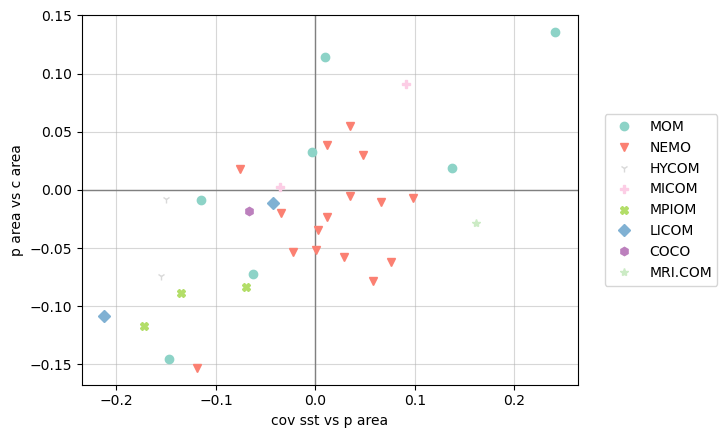

In [17]:
df_plot = pd.DataFrame({
    'y': corr_area,
    'x': corr_sst_p,
    'name': names,
    'type': model_type
})

# xgfs_normal6 = [(64, 83, 211), (221, 179, 16), (181, 29, 20), (0, 190, 255), (251, 73, 176), (0, 178, 93), (202, 202, 202)]
# xgfs_normal12 = [(235, 172, 35), (184, 0, 88), (0, 140, 249), (0, 110, 0), (0, 187, 173), (209, 99, 230), (178, 69, 2), (255, 146, 135), (89, 84, 214), (135, 133, 0), (0, 167, 108), (189, 189, 189)]
# xgfs_bright6 = [(239, 230, 69), (233, 53, 161), (0, 227, 255), (225, 86, 44), (83, 126, 255), (0, 203, 133), (238, 238, 238)]
# xgfs_dark6 = [(0, 89, 0), (0, 0, 120), (73, 13, 0), (138, 3, 79), (0, 90, 138), (68, 53, 0), (88, 88, 88)]
# xgfs_fancy6 = [(86, 100, 26), (192, 175, 251), (230, 161, 118), (0, 103, 138), (152, 68, 100), (94, 204, 171), (205, 205, 205)]
# xgfs_tarnish6 = [(39, 77, 82), (199, 162, 166), (129, 139, 112), (96, 78, 60), (140, 159, 183), (121, 104, 128), (192, 192, 192)]

marker_list = ['o','v','1','P','X','D','h','*','s','^','.']

fig, ax = plt.subplots()
ax.axvline(c='grey', lw=1)
ax.axhline(c='grey', lw=1)
cc = 0
for mtype in df_plot['type'].unique():
    plotdata_df = df_plot.loc[df_plot['type'] == mtype]
    ax.plot(plotdata_df.x, plotdata_df.y, 
            marker=marker_list[cc], 
            markeredgecolor = color_dict[mtype],
            markerfacecolor = color_dict[mtype],
            linestyle='', ms=6, label=mtype)
    cc += 1

# texts=[]
# for ind in df_plot.index:
#     texts+=[ax.text(df_plot['x'][ind], df_plot['y'][ind], df_plot['name'][ind], fontsize = 8)] # for adjustText

# adjust_text(texts, df_plot.x.values, df_plot.y.values, ax=ax, # avoid_self=True, #force_explode = (0.2, 0.2),
#             time_lim=1, #Give it 1 second instead of 0.1 sec to arrange such dense labels
#             arrowprops=dict(arrowstyle='-', color='gray', alpha=.5))

# ax.set_xlim([-1, 8])
# ax.set_ylim([-1, 8])
# ax.set_aspect('equal', adjustable='box')

# ax.set_xticks(np.linspace(0,8,5), minor=False) # only the 50% is major
# ax.set_xticks(np.linspace(-1,8,10), minor=True) # all 10th are minor
# ax.set_yticks(np.linspace(0,8,5), minor=False) # only the 50% is major
# ax.set_yticks(np.linspace(-1,8,10), minor=True) # all 10th are minor
ax.grid(which='both', axis='both',alpha=.5) # draw grid
ax.set_xlabel("cov sst vs p area")
ax.set_ylabel("p area vs c area")
ax.legend(bbox_to_anchor=(1.04, 0.5), loc="center left")
# ax.legend(loc="upper left")


In [28]:
sst_means = []
polynya_areas = []
model_type = []
names = []
for i in range(0, len(datapd)):
    name = datapd.at[i, 'source_id']    
    if not ispickleexists(name, '../../SO_data/data_sst_mean_50/'):
        continue
    sst_mean = openpickle(name, '../../SO_data/data_sst_mean_50/')

    path_polynya = '../../SO_data/data_polynya_max_mean/' + name + '_meannot0_*.pickle'
    newpath = glob.glob(path_polynya)[0]
    dsmasked = pd.read_pickle(newpath)
    dssiconc = openpickle(name, '../../SO_data/data_siconc_w_area/')
    area_p = dssiconc.areacello.where(dsmasked.sum('time')>0).sum()
    sst_means.append(sst_mean.values.item())
    polynya_areas.append(area_p.values.item())
    model_type.append(datapd.at[i, 'type'])
    names.append(name)

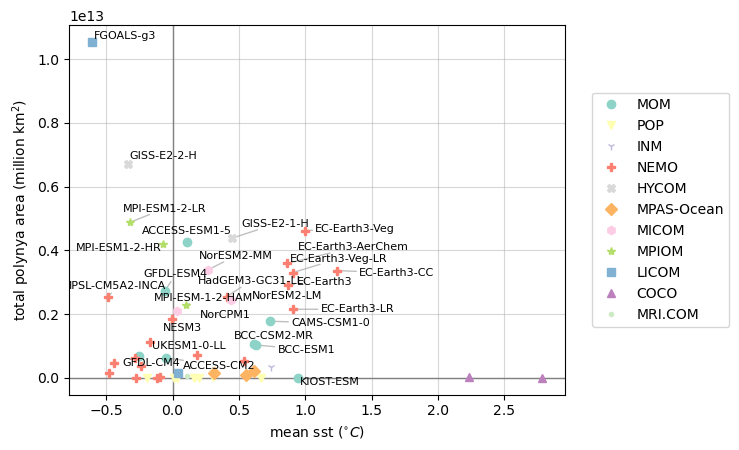

In [29]:
df_plot = pd.DataFrame({
    'y': polynya_areas,
    'x': sst_means,
    'name': names,
    'type': model_type
})

# xgfs_normal6 = [(64, 83, 211), (221, 179, 16), (181, 29, 20), (0, 190, 255), (251, 73, 176), (0, 178, 93), (202, 202, 202)]
# xgfs_normal12 = [(235, 172, 35), (184, 0, 88), (0, 140, 249), (0, 110, 0), (0, 187, 173), (209, 99, 230), (178, 69, 2), (255, 146, 135), (89, 84, 214), (135, 133, 0), (0, 167, 108), (189, 189, 189)]
# xgfs_bright6 = [(239, 230, 69), (233, 53, 161), (0, 227, 255), (225, 86, 44), (83, 126, 255), (0, 203, 133), (238, 238, 238)]
# xgfs_dark6 = [(0, 89, 0), (0, 0, 120), (73, 13, 0), (138, 3, 79), (0, 90, 138), (68, 53, 0), (88, 88, 88)]
# xgfs_fancy6 = [(86, 100, 26), (192, 175, 251), (230, 161, 118), (0, 103, 138), (152, 68, 100), (94, 204, 171), (205, 205, 205)]
# xgfs_tarnish6 = [(39, 77, 82), (199, 162, 166), (129, 139, 112), (96, 78, 60), (140, 159, 183), (121, 104, 128), (192, 192, 192)]

marker_list = ['o','v','1','P','X','D','h','*','s','^','.']

fig, ax = plt.subplots()
ax.axvline(c='grey', lw=1)
ax.axhline(c='grey', lw=1)
cc = 0
for mtype in df_plot['type'].unique():
    plotdata_df = df_plot.loc[df_plot['type'] == mtype]
    ax.plot(plotdata_df.x, plotdata_df.y, 
            marker=marker_list[cc], 
            markeredgecolor = color_dict[mtype],
            markerfacecolor = color_dict[mtype],
            linestyle='', ms=6, label=mtype)
    cc += 1

texts=[]
for ind in df_plot.index:
    if df_plot['type'][ind] == 'MOM':
        texts+=[ax.text(df_plot['x'][ind], df_plot['y'][ind], df_plot['name'][ind], fontsize = 8)] # for adjustText
    else:
        if df_plot['y'][ind]>1e12:
            texts+=[ax.text(df_plot['x'][ind], df_plot['y'][ind], df_plot['name'][ind], fontsize = 8)] # for adjustText

adjust_text(texts, df_plot.x.values, df_plot.y.values, ax=ax, # avoid_self=True, #force_explode = (0.2, 0.2),
            time_lim=1, #Give it 1 second instead of 0.1 sec to arrange such dense labels
            arrowprops=dict(arrowstyle='-', color='gray', alpha=.5))

# ax.set_xlim([-1, 8])
# ax.set_ylim([-1, 8])
# ax.set_aspect('equal', adjustable='box')

# ax.set_xticks(np.linspace(0,8,5), minor=False) # only the 50% is major
# ax.set_xticks(np.linspace(-1,8,10), minor=True) # all 10th are minor
# ax.set_yticks(np.linspace(0,8,5), minor=False) # only the 50% is major
# ax.set_yticks(np.linspace(-1,8,10), minor=True) # all 10th are minor
ax.grid(which='both', axis='both',alpha=.5) # draw grid
ax.set_xlabel("mean sst ($^{\circ}C$)")
ax.set_ylabel("total polynya area (million km$^2$)")
ax.legend(bbox_to_anchor=(1.04, 0.5), loc="center left")
# ax.legend(loc="upper left")


In [30]:
sst_means = []
polynya_areas = []
c_areas = []
model_type = []
names = []
for i in range(0, len(datapd)):
    name = datapd.at[i, 'source_id']    
    if ispickleexists(name, '../../SO_data/data_mlotst/'):
        datamld = openpickle(name, '../../SO_data/data_mlotst/')
        damld = datamld.mlotst
    else:
        datamld = openpickle(name, '../../SO_data/data_mld/')
        damld = datamld.mld
   
    area_c = datamld.areacello.where(damld.where(damld>2000).mean("time")>0).sum()/1e12
    c_areas.append(area_c.values.item())
    
    path_polynya = '../../SO_data/data_polynya_max_mean/' + name + '_meannot0_*.pickle'
    newpath = glob.glob(path_polynya)[0]
    dsmasked = pd.read_pickle(newpath)
    dssiconc = openpickle(name, '../../SO_data/data_siconc_w_area/')
    area_p = dssiconc.areacello.where(dsmasked.sum('time')>0).sum()/1e12

    # path_polynya = '../../SO_data/data_polynya_max_mean/' + name + '_meannot0_*.pickle'
    # newpath = glob.glob(path_polynya)[0]
    # dsmasked = pd.read_pickle(newpath)
    # dssiconc = openpickle(name, '../../SO_data/data_siconc_w_area/')
    # area_p = dssiconc.areacello.where(dsmasked>0)
    
    # sst_means.append(sst_mean.values.item())
    polynya_areas.append(area_p.values.item())
    model_type.append(datapd.at[i, 'type'])
    names.append(name)

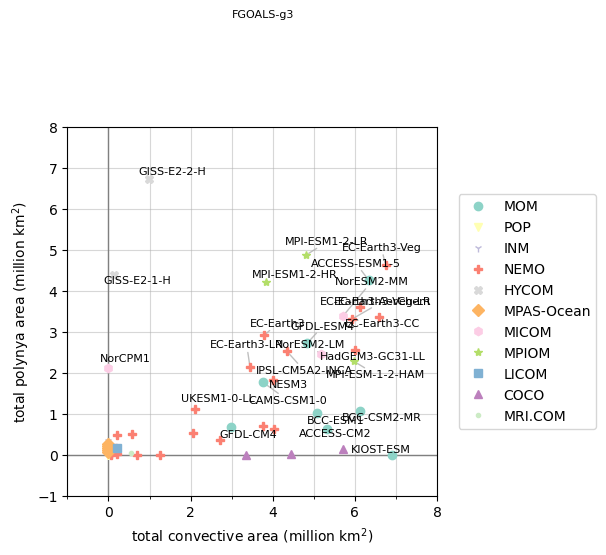

In [32]:
df_plot = pd.DataFrame({
    'y': polynya_areas,
    'x': c_areas,
    'name': names,
    'type': model_type
})

xgfs_normal6 = [(64, 83, 211), (221, 179, 16), (181, 29, 20), (0, 190, 255), (251, 73, 176), (0, 178, 93), (202, 202, 202)]
xgfs_normal12 = [(235, 172, 35), (184, 0, 88), (0, 140, 249), (0, 110, 0), (0, 187, 173), (209, 99, 230), (178, 69, 2), (255, 146, 135), (89, 84, 214), (135, 133, 0), (0, 167, 108), (189, 189, 189)]
xgfs_bright6 = [(239, 230, 69), (233, 53, 161), (0, 227, 255), (225, 86, 44), (83, 126, 255), (0, 203, 133), (238, 238, 238)]
xgfs_dark6 = [(0, 89, 0), (0, 0, 120), (73, 13, 0), (138, 3, 79), (0, 90, 138), (68, 53, 0), (88, 88, 88)]
xgfs_fancy6 = [(86, 100, 26), (192, 175, 251), (230, 161, 118), (0, 103, 138), (152, 68, 100), (94, 204, 171), (205, 205, 205)]
xgfs_tarnish6 = [(39, 77, 82), (199, 162, 166), (129, 139, 112), (96, 78, 60), (140, 159, 183), (121, 104, 128), (192, 192, 192)]

marker_list = ['o','v','1','P','X','D','h','*','s','^','.']

fig, ax = plt.subplots()
ax.axvline(c='grey', lw=1)
ax.axhline(c='grey', lw=1)
cc = 0
for mtype in df_plot['type'].unique():
    plotdata_df = df_plot.loc[df_plot['type'] == mtype]
    ax.plot(plotdata_df.x, plotdata_df.y, 
            marker=marker_list[cc], 
            markeredgecolor = color_dict[mtype],
            markerfacecolor = color_dict[mtype],
            linestyle='', ms=6, label=mtype)
    cc += 1

texts=[]
for ind in df_plot.index:
    if df_plot['type'][ind] == 'MOM':
        texts+=[ax.text(df_plot['x'][ind], df_plot['y'][ind], df_plot['name'][ind], fontsize = 8)] # for adjustText
    else:
        if df_plot['y'][ind]>1:
            texts+=[ax.text(df_plot['x'][ind], df_plot['y'][ind], df_plot['name'][ind], fontsize = 8)] # for adjustText

adjust_text(texts, df_plot.x.values, df_plot.y.values, ax=ax, # avoid_self=True, #force_explode = (0.2, 0.2),
            time_lim=1, #Give it 1 second instead of 0.1 sec to arrange such dense labels
            arrowprops=dict(arrowstyle='-', color='gray', alpha=.5))

ax.set_xlim([-1, 8])
ax.set_ylim([-1, 8])
ax.set_aspect('equal', adjustable='box')

# ax.set_xticks(np.linspace(0,8,5), minor=False) # only the 50% is major
ax.set_xticks(np.linspace(-1,8,10), minor=True) # all 10th are minor
# ax.set_yticks(np.linspace(0,8,5), minor=False) # only the 50% is major
ax.set_yticks(np.linspace(-1,8,10), minor=True) # all 10th are minor
ax.grid(which='both', axis='both',alpha=.5) # draw grid
ax.set_xlabel("total convective area (million km$^2$)")
ax.set_ylabel("total polynya area (million km$^2$)")
ax.legend(bbox_to_anchor=(1.04, 0.5), loc="center left")
# ax.legend(loc="upper left")


In [ ]:
sst_means = []
polynya_areas = []
c_areas = []
model_type = []
names = []
for i in range(0, len(datapd)):
    name = datapd.at[i, 'source_id']    
    if ispickleexists(name, '../../SO_data/data_mlotst/'):
        datamld = openpickle(name, '../../SO_data/data_mlotst/')
        damld = datamld.mlotst
    else:
        datamld = openpickle(name, '../../SO_data/data_mld/')
        damld = datamld.mld
   
    area_c = datamld.areacello.where(damld.where(damld>2000)>0).sum()/1e12
    c_areas.append(area_c.values.item())
    
    path_polynya = '../../SO_data/data_polynya_max_mean/' + name + '_meannot0_*.pickle'
    newpath = glob.glob(path_polynya)[0]
    dsmasked = pd.read_pickle(newpath)
    dssiconc = openpickle(name, '../../SO_data/data_siconc_w_area/')
    area_p = dssiconc.areacello.where(dsmasked.sum('time')>0).sum()/1e12

    # path_polynya = '../../SO_data/data_polynya_max_mean/' + name + '_meannot0_*.pickle'
    # newpath = glob.glob(path_polynya)[0]
    # dsmasked = pd.read_pickle(newpath)
    # dssiconc = openpickle(name, '../../SO_data/data_siconc_w_area/')
    # area_p = dssiconc.areacello.where(dsmasked>0)
    
    # sst_means.append(sst_mean.values.item())
    polynya_areas.append(area_p.values.item())
    model_type.append(datapd.at[i, 'type'])
    names.append(name)

In [13]:
sst_means = []
polynya_areas = []
model_type = []
names = []
corr_area = []
corr_area_p_sss = []
for i in range(0, len(datapd)):
    name = datapd.at[i, 'source_id']    
    print("{} {}".format(i,name))
    if not ispickleexists(name, '../../SO_data/data_sos/'):
        continue
    sss = openpickle(name, '../../SO_data/data_sos/')
    if 'so' in sss:
        dssos = sss.so
    elif 'sos' in sss:
        dssos = sss.sos
    sos_south = dssos.where(sss.newlat <= -55).mean((dssos.dims[-1], dssos.dims[-2]))

    # if name == 'TaiESM1':
    #     sst_mean = sst_mean.isel(time = slice(-100, None))
    # if name in ['EC-Earth3-AerChem', 'IPSL-CM6A-LR']:
    #     continue

    path_polynya = '../../SO_data/data_polynya_max_mean/' + name + '_meannot0_*.pickle'
    newpath = glob.glob(path_polynya)[0]
    dsmasked = pd.read_pickle(newpath)
    dssiconc = openpickle(name, '../../SO_data/data_siconc_w_area/')
    area_p = dssiconc.areacello.where(dsmasked>0).sum(dim = dssiconc.areacello.dims)
    if (area_p == 0).all():
        print('no polynya')
        continue

    if len(sos_south.time) != len(area_p.time):
        print('time difference')
        continue
    co = np.corrcoef(sos_south.values, area_p.values)[1,0]
    

    if ispickleexists(name, '../../SO_data/data_mlotst/'):
        ds_mld = openpickle(name, '../../SO_data/data_mlotst/')
        da_mld = ds_mld.mlotst
    else:
        ds_mld = openpickle(name, '../../SO_data/data_mld/')
        da_mld = ds_mld.mld
    if name == 'TaiESM1':
        da_mld = da_mld.isel(time = slice(-100, None))
        
    area_c = ds_mld.areacello.where(da_mld>=2000).sum(dim = ds_mld.areacello.dims)
    if (area_c == 0).all():
        print('no convection')
        continue

    co2 = np.corrcoef(area_c.values, area_p.values)[1,0]
    corr_area_p_sss.append(co)
    corr_area.append(co2)
    # sst_means.append(sst_mean.values.item())
    # polynya_areas.append(area_p.values.item())
    model_type.append(datapd.at[i, 'type'])
    names.append(name)

0 CAMS-CSM1-0
1 BCC-CSM2-MR
2 BCC-ESM1
3 KIOST-ESM
no polynya
4 ACCESS-ESM1-5
5 ACCESS-CM2
6 GFDL-CM4
7 GFDL-ESM4
8 TaiESM1
no polynya
9 SAM0-UNICON
no polynya
10 CIESM
no polynya
11 CESM2
no polynya
12 CESM2-FV2
no polynya
13 CESM2-WACCM
no polynya
14 CESM2-WACCM-FV2
no convection
15 INM-CM4-8
no convection
16 NESM3
17 CanESM5
18 CanESM5-1
19 CanESM5-CanOE
20 CMCC-CM2-SR5
21 CMCC-ESM2
no polynya
22 EC-Earth3
23 EC-Earth3-CC
24 EC-Earth3-LR
25 EC-Earth3-Veg
26 EC-Earth3-Veg-LR
27 EC-Earth3-AerChem
time difference
28 CNRM-CM6-1
29 CNRM-CM6-1-HR
30 CNRM-ESM2-1
31 HadGEM3-GC31-LL
32 HadGEM3-GC31-MM
33 UKESM1-0-LL
34 UKESM1-1-LL
35 IPSL-CM5A2-INCA
36 IPSL-CM6A-LR
time difference
37 IPSL-CM6A-MR1
no polynya
38 GISS-E2-1-H
39 GISS-E2-2-H
40 E3SM-1-0
no convection
41 E3SM-1-1
no convection
42 E3SM-1-1-ECA
no convection
43 E3SM-2-0
no convection
44 E3SM-2-0-NARRM
no convection
45 NorCPM1
no convection
46 NorESM2-MM
47 NorESM2-LM
48 MPI-ESM-1-2-HAM
49 MPI-ESM1-2-HR
50 MPI-ESM1-2-LR
51 CAS-ESM2-

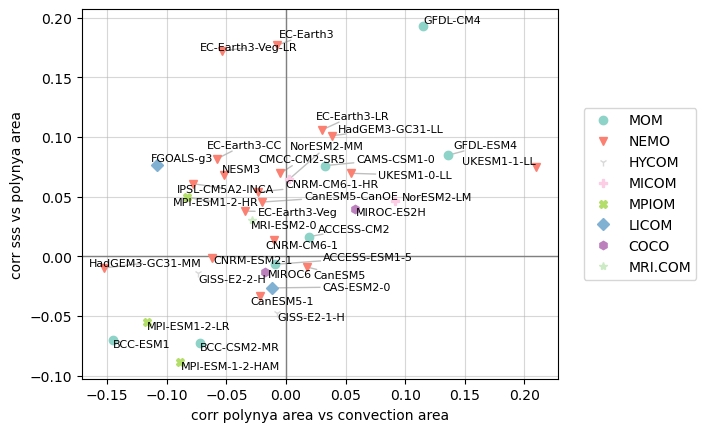

In [22]:
df_plot = pd.DataFrame({
    'y': corr_area_p_sss,
    'x': corr_area,
    'name': names,
    'type': model_type
})

xgfs_normal6 = [(64, 83, 211), (221, 179, 16), (181, 29, 20), (0, 190, 255), (251, 73, 176), (0, 178, 93), (202, 202, 202)]
xgfs_normal12 = [(235, 172, 35), (184, 0, 88), (0, 140, 249), (0, 110, 0), (0, 187, 173), (209, 99, 230), (178, 69, 2), (255, 146, 135), (89, 84, 214), (135, 133, 0), (0, 167, 108), (189, 189, 189)]
xgfs_bright6 = [(239, 230, 69), (233, 53, 161), (0, 227, 255), (225, 86, 44), (83, 126, 255), (0, 203, 133), (238, 238, 238)]
xgfs_dark6 = [(0, 89, 0), (0, 0, 120), (73, 13, 0), (138, 3, 79), (0, 90, 138), (68, 53, 0), (88, 88, 88)]
xgfs_fancy6 = [(86, 100, 26), (192, 175, 251), (230, 161, 118), (0, 103, 138), (152, 68, 100), (94, 204, 171), (205, 205, 205)]
xgfs_tarnish6 = [(39, 77, 82), (199, 162, 166), (129, 139, 112), (96, 78, 60), (140, 159, 183), (121, 104, 128), (192, 192, 192)]

marker_list = ['o','v','1','P','X','D','h','*','s','^','.']

fig, ax = plt.subplots()
ax.axvline(c='grey', lw=1)
ax.axhline(c='grey', lw=1)
cc = 0
for mtype in df_plot['type'].unique():
    plotdata_df = df_plot.loc[df_plot['type'] == mtype]
    ax.plot(plotdata_df.x, plotdata_df.y, 
            marker=marker_list[cc], 
            markeredgecolor = color_dict[mtype],
            markerfacecolor = color_dict[mtype],
            linestyle='', ms=6, label=mtype)
    cc += 1

texts=[]
for ind in df_plot.index:
    if df_plot['type'][ind] == 'MOM':
        texts+=[ax.text(df_plot['x'][ind], df_plot['y'][ind], df_plot['name'][ind], fontsize = 8)] # for adjustText
    else:
        if df_plot['y'][ind]<=1:
            texts+=[ax.text(df_plot['x'][ind], df_plot['y'][ind], df_plot['name'][ind], fontsize = 8)] # for adjustText

adjust_text(texts, df_plot.x.values, df_plot.y.values, ax=ax, # avoid_self=True, #force_explode = (0.2, 0.2),
            time_lim=1, #Give it 1 second instead of 0.1 sec to arrange such dense labels
            arrowprops=dict(arrowstyle='-', color='gray', alpha=.5))

# ax.set_xlim([-1, 8])
# ax.set_ylim([-1, 8])
ax.set_aspect('equal', adjustable='box')

# ax.set_xticks(np.linspace(0,8,5), minor=False) # only the 50% is major
# ax.set_xticks(np.linspace(-1,8,10), minor=True) # all 10th are minor
# ax.set_yticks(np.linspace(0,8,5), minor=False) # only the 50% is major
# ax.set_yticks(np.linspace(-1,8,10), minor=True) # all 10th are minor
ax.grid(which='both', axis='both',alpha=.5) # draw grid
ax.set_xlabel("corr polynya area vs convection area")
ax.set_ylabel("corr sss vs polynya area")
ax.legend(bbox_to_anchor=(1.04, 0.5), loc="center left")
# ax.legend(loc="upper left")


In [35]:
sst_means = []
polynya_areas = []
model_type = []
names = []
list_sos_mean = []
areas_polynya = []
for i in range(0, len(datapd)):
    name = datapd.at[i, 'source_id'] 

    print("{} {}".format(i,name))
    if name in ['E3SM-1-0', 'E3SM-1-1']:
        continue
    if not ispickleexists(name, '../../SO_data/data_sos/'):
        continue
    sss = openpickle(name, '../../SO_data/data_sos/')
    if 'so' in sss:
        dssos = sss.so
    elif 'sos' in sss:
        dssos = sss.sos
    sos_south = dssos.where(sss.newlat <= -55).mean((dssos.dims[-1], dssos.dims[-2]))
    sos_mean = sos_south.mean()

    # if name == 'TaiESM1':
    #     sst_mean = sst_mean.isel(time = slice(-100, None))
    # if name in ['EC-Earth3-AerChem', 'IPSL-CM6A-LR']:
    #     continue

    path_polynya = '../../SO_data/data_polynya_max_mean/' + name + '_meannot0_*.pickle'
    newpath = glob.glob(path_polynya)[0]
    dsmasked = pd.read_pickle(newpath)
    dssiconc = openpickle(name, '../../SO_data/data_siconc_w_area/')
    
    area_p = dssiconc.areacello.where(dsmasked.mean('time')>0).sum(dim = dssiconc.areacello.dims)/1e12
    if (area_p == 0).all():
        print('no polynya')
        continue

    # if len(sos_south.time) != len(area_p.time):
    #     print('time difference')
    #     continue
    # co = np.corrcoef(sos_south.values, area_p.values)[1,0]
    

    # if ispickleexists(name, '../../SO_data/data_mlotst/'):
    #     ds_mld = openpickle(name, '../../SO_data/data_mlotst/')
    #     da_mld = ds_mld.mlotst
    # else:
    #     ds_mld = openpickle(name, '../../SO_data/data_mld/')
    #     da_mld = ds_mld.mld
    # if name == 'TaiESM1':
    #     da_mld = da_mld.isel(time = slice(-100, None))
        
    # area_c = ds_mld.areacello.where(da_mld>=2000).sum(dim = ds_mld.areacello.dims)
    # if (area_c == 0).all():
    #     print('no convection')
    #     continue
    list_sos_mean.append(sos_mean)
    areas_polynya.append(area_p)


    # sst_means.append(sst_mean.values.item())
    # polynya_areas.append(area_p.values.item())
    model_type.append(datapd.at[i, 'type'])
    names.append(name)

0 CAMS-CSM1-0
1 BCC-CSM2-MR
2 BCC-ESM1
3 KIOST-ESM
no polynya
4 ACCESS-ESM1-5
5 ACCESS-CM2
6 GFDL-CM4
7 GFDL-ESM4
8 TaiESM1
no polynya
9 SAM0-UNICON
no polynya
10 CIESM
no polynya
11 CESM2
no polynya
12 CESM2-FV2
no polynya
13 CESM2-WACCM
no polynya
14 CESM2-WACCM-FV2
15 INM-CM4-8
16 NESM3
17 CanESM5
18 CanESM5-1
19 CanESM5-CanOE
20 CMCC-CM2-SR5
21 CMCC-ESM2
no polynya
22 EC-Earth3
23 EC-Earth3-CC
24 EC-Earth3-LR
25 EC-Earth3-Veg
26 EC-Earth3-Veg-LR
27 EC-Earth3-AerChem
28 CNRM-CM6-1
29 CNRM-CM6-1-HR
30 CNRM-ESM2-1
31 HadGEM3-GC31-LL
32 HadGEM3-GC31-MM
33 UKESM1-0-LL
34 UKESM1-1-LL
35 IPSL-CM5A2-INCA
36 IPSL-CM6A-LR
37 IPSL-CM6A-MR1
no polynya
38 GISS-E2-1-H
39 GISS-E2-2-H
40 E3SM-1-0
41 E3SM-1-1
42 E3SM-1-1-ECA
43 E3SM-2-0
44 E3SM-2-0-NARRM
45 NorCPM1
46 NorESM2-MM
47 NorESM2-LM
48 MPI-ESM-1-2-HAM
49 MPI-ESM1-2-HR
50 MPI-ESM1-2-LR
51 CAS-ESM2-0
52 FGOALS-g3
53 MIROC6
54 MIROC-ES2L
no polynya
55 MIROC-ES2H
56 MRI-ESM2-0


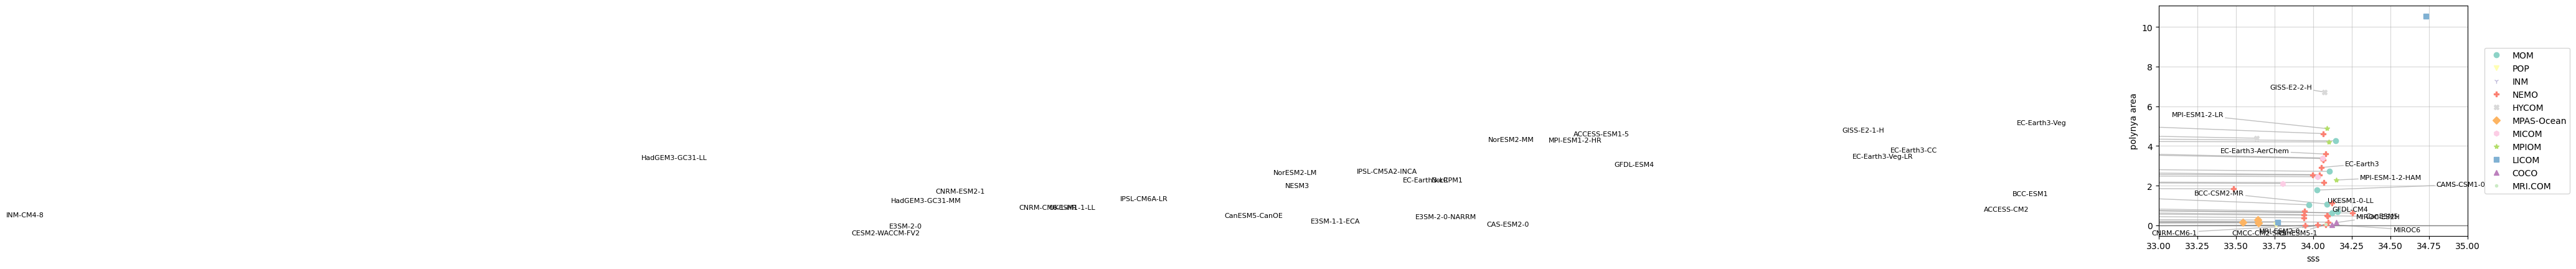

In [42]:
df_plot = pd.DataFrame({
    'y': areas_polynya,
    'x': list_sos_mean,
    'name': names,
    'type': model_type
})

xgfs_normal6 = [(64, 83, 211), (221, 179, 16), (181, 29, 20), (0, 190, 255), (251, 73, 176), (0, 178, 93), (202, 202, 202)]
xgfs_normal12 = [(235, 172, 35), (184, 0, 88), (0, 140, 249), (0, 110, 0), (0, 187, 173), (209, 99, 230), (178, 69, 2), (255, 146, 135), (89, 84, 214), (135, 133, 0), (0, 167, 108), (189, 189, 189)]
xgfs_bright6 = [(239, 230, 69), (233, 53, 161), (0, 227, 255), (225, 86, 44), (83, 126, 255), (0, 203, 133), (238, 238, 238)]
xgfs_dark6 = [(0, 89, 0), (0, 0, 120), (73, 13, 0), (138, 3, 79), (0, 90, 138), (68, 53, 0), (88, 88, 88)]
xgfs_fancy6 = [(86, 100, 26), (192, 175, 251), (230, 161, 118), (0, 103, 138), (152, 68, 100), (94, 204, 171), (205, 205, 205)]
xgfs_tarnish6 = [(39, 77, 82), (199, 162, 166), (129, 139, 112), (96, 78, 60), (140, 159, 183), (121, 104, 128), (192, 192, 192)]

marker_list = ['o','v','1','P','X','D','h','*','s','^','.']

fig, ax = plt.subplots()
ax.axvline(c='grey', lw=1)
ax.axhline(c='grey', lw=1)
cc = 0
for mtype in df_plot['type'].unique():
    plotdata_df = df_plot.loc[df_plot['type'] == mtype]
    ax.plot(plotdata_df.x, plotdata_df.y, 
            marker=marker_list[cc], 
            markeredgecolor = color_dict[mtype],
            markerfacecolor = color_dict[mtype],
            linestyle='', ms=6, label=mtype)
    cc += 1

texts=[]
for ind in df_plot.index:
    if df_plot['type'][ind] == 'MOM':
        texts+=[ax.text(df_plot['x'][ind], df_plot['y'][ind], df_plot['name'][ind], fontsize = 8)] # for adjustText
    else:
        if df_plot['y'][ind]<=10:
            texts+=[ax.text(df_plot['x'][ind], df_plot['y'][ind], df_plot['name'][ind], fontsize = 8)] # for adjustText

adjust_text(texts, df_plot.x.values, df_plot.y.values, ax=ax, # avoid_self=True, #force_explode = (0.2, 0.2),
            time_lim=1, #Give it 1 second instead of 0.1 sec to arrange such dense labels
            arrowprops=dict(arrowstyle='-', color='gray', alpha=.5))

ax.set_xlim([33, 35])
# ax.set_ylim([-1, 8])
# ax.set_aspect('equal', adjustable='box')

# ax.set_xticks(np.linspace(0,8,5), minor=False) # only the 50% is major
# ax.set_xticks(np.linspace(-1,8,10), minor=True) # all 10th are minor
# ax.set_yticks(np.linspace(0,8,5), minor=False) # only the 50% is major
# ax.set_yticks(np.linspace(-1,8,10), minor=True) # all 10th are minor
ax.grid(which='both', axis='both',alpha=.5) # draw grid
ax.set_xlabel("sss")
ax.set_ylabel("polynya area")
ax.legend(bbox_to_anchor=(1.04, 0.5), loc="center left")
# ax.legend(loc="upper left")


In [44]:
sst_means = []
polynya_areas = []
model_type = []
names = []
list_sos_mean = []
areas_polynya = []
for i in range(0, len(datapd)):
    name = datapd.at[i, 'source_id'] 

    print("{} {}".format(i,name))
    # if name in ['E3SM-1-0', 'E3SM-1-1']:
    #     continue
    # if not ispickleexists(name, '../../SO_data/data_sos/'):
    #     continue
    # sss = openpickle(name, '../../SO_data/data_sos/')
    # if 'so' in sss:
    #     dssos = sss.so
    # elif 'sos' in sss:
    #     dssos = sss.sos
    # sos_south = dssos.where(sss.newlat <= -55).mean((dssos.dims[-1], dssos.dims[-2]))
    # sos_mean = sos_south.mean()

    # if name == 'TaiESM1':
    #     sst_mean = sst_mean.isel(time = slice(-100, None))
    # if name in ['EC-Earth3-AerChem', 'IPSL-CM6A-LR']:
    #     continue

    path_polynya = '../../SO_data/data_polynya_max_mean/' + name + '_meannot0_*.pickle'
    newpath = glob.glob(path_polynya)[0]
    dsmasked = pd.read_pickle(newpath)
    dssiconc = openpickle(name, '../../SO_data/data_siconc_w_area/')
    
    area_p = dssiconc.siconc.where(dsmasked.mean('time')>0).mean()
    if (area_p == 0).all():
        print('no polynya')
        continue

    # if len(sos_south.time) != len(area_p.time):
    #     print('time difference')
    #     continue
    # co = np.corrcoef(sos_south.values, area_p.values)[1,0]
    

    if ispickleexists(name, '../../SO_data/data_mlotst/'):
        ds_mld = openpickle(name, '../../SO_data/data_mlotst/')
        da_mld = ds_mld.mlotst
    else:
        ds_mld = openpickle(name, '../../SO_data/data_mld/')
        da_mld = ds_mld.mld
    if name == 'TaiESM1':
        da_mld = da_mld.isel(time = slice(-100, None))

    mldarea = da_mld.where(da_mld>=2000).mean('time')
        
    area_c = ds_mld.areacello.where(mldarea>0).sum()
    if (area_c == 0).all():
        print('no convection')
        continue
    list_sos_mean.append(area_p)
    areas_polynya.append(area_c)


    # sst_means.append(sst_mean.values.item())
    # polynya_areas.append(area_p.values.item())
    model_type.append(datapd.at[i, 'type'])
    names.append(name)

0 CAMS-CSM1-0
1 BCC-CSM2-MR
2 BCC-ESM1
3 KIOST-ESM
4 ACCESS-ESM1-5
5 ACCESS-CM2
6 GFDL-CM4
7 GFDL-ESM4
8 TaiESM1
no convection
9 SAM0-UNICON
no convection
10 CIESM
no convection
11 CESM2
no convection
12 CESM2-FV2
no convection
13 CESM2-WACCM
no convection
14 CESM2-WACCM-FV2
no convection
15 INM-CM4-8
no convection
16 NESM3
17 CanESM5
18 CanESM5-1
19 CanESM5-CanOE
20 CMCC-CM2-SR5
21 CMCC-ESM2
22 EC-Earth3
23 EC-Earth3-CC
24 EC-Earth3-LR
25 EC-Earth3-Veg
26 EC-Earth3-Veg-LR
27 EC-Earth3-AerChem
28 CNRM-CM6-1
29 CNRM-CM6-1-HR
30 CNRM-ESM2-1
31 HadGEM3-GC31-LL
32 HadGEM3-GC31-MM
33 UKESM1-0-LL
34 UKESM1-1-LL
35 IPSL-CM5A2-INCA
36 IPSL-CM6A-LR
37 IPSL-CM6A-MR1
38 GISS-E2-1-H
39 GISS-E2-2-H
40 E3SM-1-0
no convection
41 E3SM-1-1
no convection
42 E3SM-1-1-ECA
no convection
43 E3SM-2-0
no convection
44 E3SM-2-0-NARRM
no convection
45 NorCPM1
no convection
46 NorESM2-MM
47 NorESM2-LM
48 MPI-ESM-1-2-HAM
49 MPI-ESM1-2-HR
50 MPI-ESM1-2-LR
51 CAS-ESM2-0
52 FGOALS-g3
53 MIROC6
54 MIROC-ES2L
55 MIROC

posx and posy should be finite values


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


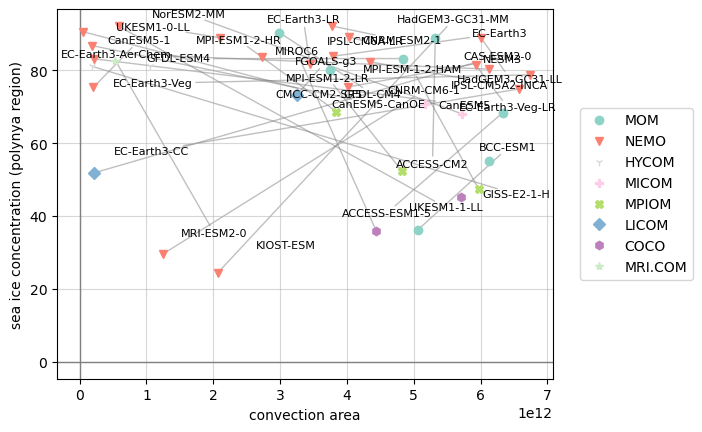

In [46]:
df_plot = pd.DataFrame({
    'x': areas_polynya,
    'y': list_sos_mean,
    'name': names,
    'type': model_type
})

xgfs_normal6 = [(64, 83, 211), (221, 179, 16), (181, 29, 20), (0, 190, 255), (251, 73, 176), (0, 178, 93), (202, 202, 202)]
xgfs_normal12 = [(235, 172, 35), (184, 0, 88), (0, 140, 249), (0, 110, 0), (0, 187, 173), (209, 99, 230), (178, 69, 2), (255, 146, 135), (89, 84, 214), (135, 133, 0), (0, 167, 108), (189, 189, 189)]
xgfs_bright6 = [(239, 230, 69), (233, 53, 161), (0, 227, 255), (225, 86, 44), (83, 126, 255), (0, 203, 133), (238, 238, 238)]
xgfs_dark6 = [(0, 89, 0), (0, 0, 120), (73, 13, 0), (138, 3, 79), (0, 90, 138), (68, 53, 0), (88, 88, 88)]
xgfs_fancy6 = [(86, 100, 26), (192, 175, 251), (230, 161, 118), (0, 103, 138), (152, 68, 100), (94, 204, 171), (205, 205, 205)]
xgfs_tarnish6 = [(39, 77, 82), (199, 162, 166), (129, 139, 112), (96, 78, 60), (140, 159, 183), (121, 104, 128), (192, 192, 192)]

marker_list = ['o','v','1','P','X','D','h','*','s','^','.']

fig, ax = plt.subplots()
ax.axvline(c='grey', lw=1)
ax.axhline(c='grey', lw=1)
cc = 0
for mtype in df_plot['type'].unique():
    plotdata_df = df_plot.loc[df_plot['type'] == mtype]
    ax.plot(plotdata_df.x, plotdata_df.y, 
            marker=marker_list[cc], 
            markeredgecolor = color_dict[mtype],
            markerfacecolor = color_dict[mtype],
            linestyle='', ms=6, label=mtype)
    cc += 1

texts=[]
for ind in df_plot.index:
    if df_plot['type'][ind] == 'MOM':
        texts+=[ax.text(df_plot['x'][ind], df_plot['y'][ind], df_plot['name'][ind], fontsize = 8)] # for adjustText
    else:
        if df_plot['y'][ind]<=100:
            texts+=[ax.text(df_plot['x'][ind], df_plot['y'][ind], df_plot['name'][ind], fontsize = 8)] # for adjustText

adjust_text(texts, df_plot.x.values, df_plot.y.values, ax=ax, # avoid_self=True, #force_explode = (0.2, 0.2),
            time_lim=1, #Give it 1 second instead of 0.1 sec to arrange such dense labels
            arrowprops=dict(arrowstyle='-', color='gray', alpha=.5))

# ax.set_xlim([33, 35])
# ax.set_ylim([-1, 8])
# ax.set_aspect('equal', adjustable='box')

# ax.set_xticks(np.linspace(0,8,5), minor=False) # only the 50% is major
# ax.set_xticks(np.linspace(-1,8,10), minor=True) # all 10th are minor
# ax.set_yticks(np.linspace(0,8,5), minor=False) # only the 50% is major
# ax.set_yticks(np.linspace(-1,8,10), minor=True) # all 10th are minor
ax.grid(which='both', axis='both',alpha=.5) # draw grid
ax.set_xlabel("convection area")
ax.set_ylabel("sea ice concentration (polynya region)")
ax.legend(bbox_to_anchor=(1.04, 0.5), loc="center left")
# ax.legend(loc="upper left")


In [47]:
sst_means = []
polynya_areas = []
model_type = []
names = []
list_sos_mean = []
areas_polynya = []
for i in range(0, len(datapd)):
    name = datapd.at[i, 'source_id'] 

    print("{} {}".format(i,name))
    # if name in ['E3SM-1-0', 'E3SM-1-1']:
    #     continue
    # if not ispickleexists(name, '../../SO_data/data_sos/'):
    #     continue
    # sss = openpickle(name, '../../SO_data/data_sos/')
    # if 'so' in sss:
    #     dssos = sss.so
    # elif 'sos' in sss:
    #     dssos = sss.sos
    # sos_south = dssos.where(sss.newlat <= -55).mean((dssos.dims[-1], dssos.dims[-2]))
    # sos_mean = sos_south.mean()

    # if name == 'TaiESM1':
    #     sst_mean = sst_mean.isel(time = slice(-100, None))
    # if name in ['EC-Earth3-AerChem', 'IPSL-CM6A-LR']:
    #     continue

    path_polynya = '../../SO_data/data_polynya_max_mean/' + name + '_meannot0_*.pickle'
    newpath = glob.glob(path_polynya)[0]
    dsmasked = pd.read_pickle(newpath)
    dssiconc = openpickle(name, '../../SO_data/data_siconc_w_area/')
    
    area_p = dssiconc.siconc.where(dssiconc.siconc>=15).mean()
    if (area_p == 0).all():
        print('no polynya')
        continue

    # if len(sos_south.time) != len(area_p.time):
    #     print('time difference')
    #     continue
    # co = np.corrcoef(sos_south.values, area_p.values)[1,0]
    

    if ispickleexists(name, '../../SO_data/data_mlotst/'):
        ds_mld = openpickle(name, '../../SO_data/data_mlotst/')
        da_mld = ds_mld.mlotst
    else:
        ds_mld = openpickle(name, '../../SO_data/data_mld/')
        da_mld = ds_mld.mld
    if name == 'TaiESM1':
        da_mld = da_mld.isel(time = slice(-100, None))

    mldarea = da_mld.where(da_mld>=2000).mean('time')
        
    area_c = ds_mld.areacello.where(mldarea>0).sum()
    if (area_c == 0).all():
        print('no convection')
        continue
    list_sos_mean.append(area_p)
    areas_polynya.append(area_c)


    # sst_means.append(sst_mean.values.item())
    # polynya_areas.append(area_p.values.item())
    model_type.append(datapd.at[i, 'type'])
    names.append(name)

0 CAMS-CSM1-0
1 BCC-CSM2-MR
2 BCC-ESM1
3 KIOST-ESM
4 ACCESS-ESM1-5
5 ACCESS-CM2
6 GFDL-CM4
7 GFDL-ESM4
8 TaiESM1
no convection
9 SAM0-UNICON
no convection
10 CIESM
no convection
11 CESM2
no convection
12 CESM2-FV2
no convection
13 CESM2-WACCM
no convection
14 CESM2-WACCM-FV2
no convection
15 INM-CM4-8
no convection
16 NESM3
17 CanESM5
18 CanESM5-1
19 CanESM5-CanOE
20 CMCC-CM2-SR5
21 CMCC-ESM2
22 EC-Earth3
23 EC-Earth3-CC
24 EC-Earth3-LR
25 EC-Earth3-Veg
26 EC-Earth3-Veg-LR
27 EC-Earth3-AerChem
28 CNRM-CM6-1
29 CNRM-CM6-1-HR
30 CNRM-ESM2-1
31 HadGEM3-GC31-LL
32 HadGEM3-GC31-MM
33 UKESM1-0-LL
34 UKESM1-1-LL
35 IPSL-CM5A2-INCA
36 IPSL-CM6A-LR
37 IPSL-CM6A-MR1
38 GISS-E2-1-H
39 GISS-E2-2-H
40 E3SM-1-0
no convection
41 E3SM-1-1
no convection
42 E3SM-1-1-ECA
no convection
43 E3SM-2-0
no convection
44 E3SM-2-0-NARRM
no convection
45 NorCPM1
no convection
46 NorESM2-MM
47 NorESM2-LM
48 MPI-ESM-1-2-HAM
49 MPI-ESM1-2-HR
50 MPI-ESM1-2-LR
51 CAS-ESM2-0
52 FGOALS-g3
53 MIROC6
54 MIROC-ES2L
55 MIROC

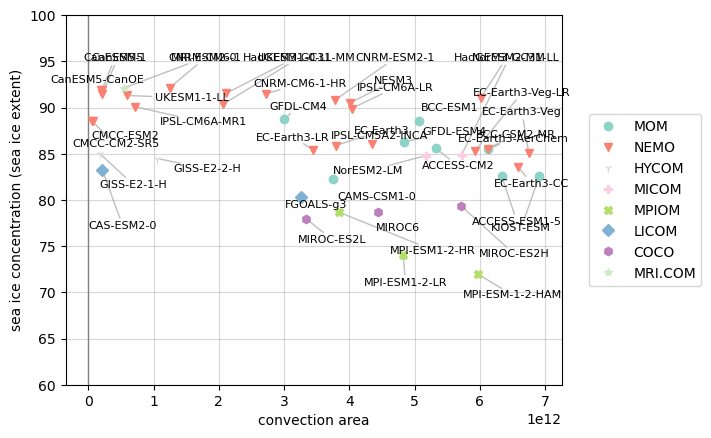

In [49]:
df_plot = pd.DataFrame({
    'x': areas_polynya,
    'y': list_sos_mean,
    'name': names,
    'type': model_type
})

xgfs_normal6 = [(64, 83, 211), (221, 179, 16), (181, 29, 20), (0, 190, 255), (251, 73, 176), (0, 178, 93), (202, 202, 202)]
xgfs_normal12 = [(235, 172, 35), (184, 0, 88), (0, 140, 249), (0, 110, 0), (0, 187, 173), (209, 99, 230), (178, 69, 2), (255, 146, 135), (89, 84, 214), (135, 133, 0), (0, 167, 108), (189, 189, 189)]
xgfs_bright6 = [(239, 230, 69), (233, 53, 161), (0, 227, 255), (225, 86, 44), (83, 126, 255), (0, 203, 133), (238, 238, 238)]
xgfs_dark6 = [(0, 89, 0), (0, 0, 120), (73, 13, 0), (138, 3, 79), (0, 90, 138), (68, 53, 0), (88, 88, 88)]
xgfs_fancy6 = [(86, 100, 26), (192, 175, 251), (230, 161, 118), (0, 103, 138), (152, 68, 100), (94, 204, 171), (205, 205, 205)]
xgfs_tarnish6 = [(39, 77, 82), (199, 162, 166), (129, 139, 112), (96, 78, 60), (140, 159, 183), (121, 104, 128), (192, 192, 192)]

marker_list = ['o','v','1','P','X','D','h','*','s','^','.']

fig, ax = plt.subplots()
ax.axvline(c='grey', lw=1)
ax.axhline(c='grey', lw=1)
cc = 0
for mtype in df_plot['type'].unique():
    plotdata_df = df_plot.loc[df_plot['type'] == mtype]
    ax.plot(plotdata_df.x, plotdata_df.y, 
            marker=marker_list[cc], 
            markeredgecolor = color_dict[mtype],
            markerfacecolor = color_dict[mtype],
            linestyle='', ms=6, label=mtype)
    cc += 1

texts=[]
for ind in df_plot.index:
    if df_plot['type'][ind] == 'MOM':
        texts+=[ax.text(df_plot['x'][ind], df_plot['y'][ind], df_plot['name'][ind], fontsize = 8)] # for adjustText
    else:
        if df_plot['y'][ind]<=100:
            texts+=[ax.text(df_plot['x'][ind], df_plot['y'][ind], df_plot['name'][ind], fontsize = 8)] # for adjustText

adjust_text(texts, df_plot.x.values, df_plot.y.values, ax=ax, # avoid_self=True, #force_explode = (0.2, 0.2),
            time_lim=1, #Give it 1 second instead of 0.1 sec to arrange such dense labels
            arrowprops=dict(arrowstyle='-', color='gray', alpha=.5))

# ax.set_xlim([33, 35])
ax.set_ylim([60, 100])
# ax.set_aspect('equal', adjustable='box')

# ax.set_xticks(np.linspace(0,8,5), minor=False) # only the 50% is major
# ax.set_xticks(np.linspace(-1,8,10), minor=True) # all 10th are minor
# ax.set_yticks(np.linspace(0,8,5), minor=False) # only the 50% is major
# ax.set_yticks(np.linspace(-1,8,10), minor=True) # all 10th are minor
ax.grid(which='both', axis='both',alpha=.5) # draw grid
ax.set_xlabel("convection area")
ax.set_ylabel("sea ice concentration (sea ice extent)")
ax.legend(bbox_to_anchor=(1.04, 0.5), loc="center left")
# ax.legend(loc="upper left")


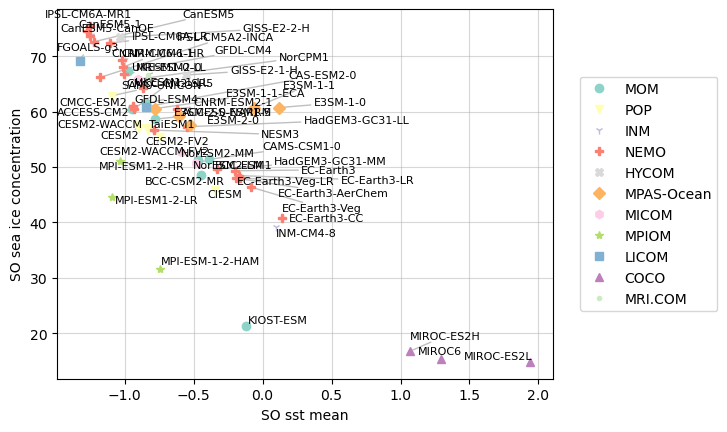

In [6]:
sst_means = []
siconc_means = []
model_type = []
names = []
for i in range(0, len(datapd)):
    name = datapd.at[i, 'source_id']    
    if not ispickleexists(name, '../../SO_data/data_sst/'):
        continue
    sst = openpickle(name, '../../SO_data/data_sst/')
    if 'tos' in sst:
        dssst = sst.tos
    elif 'thetao' in sst:
        dssst = sst.thetao
        
    dssiconc = openpickle(name, '../../SO_data/data_siconc_w_area/')

    dssst_south = dssst.where(sst.newlat<=-55).mean()
    dssiconc_south = dssiconc.siconc.where(dssiconc.newlat <= -55).mean()
    
    sst_means.append(dssst_south.values.item())
    siconc_means.append(dssiconc_south.values.item())
    model_type.append(datapd.at[i, 'type'])
    names.append(name)


df_plot = pd.DataFrame({
    'x': sst_means,
    'y': siconc_means,
    'name': names,
    'type': model_type
})


marker_list = ['o','v','1','P','X','D','h','*','s','^','.']

fig, ax = plt.subplots()
# ax.axvline(c='grey', lw=1)
# ax.axhline(c='grey', lw=1)
cc = 0
for mtype in df_plot['type'].unique():
    plotdata_df = df_plot.loc[df_plot['type'] == mtype]
    ax.plot(plotdata_df.x, plotdata_df.y, 
            marker=marker_list[cc], 
            markeredgecolor = color_dict[mtype],
            markerfacecolor = color_dict[mtype],
            linestyle='', ms=6, label=mtype)
    cc += 1

texts=[]
for ind in df_plot.index:
    if df_plot['type'][ind] == 'MOM':
        texts+=[ax.text(df_plot['x'][ind], df_plot['y'][ind], df_plot['name'][ind], fontsize = 8)] # for adjustText
    else:
        if df_plot['y'][ind]<=100:
            texts+=[ax.text(df_plot['x'][ind], df_plot['y'][ind], df_plot['name'][ind], fontsize = 8)] # for adjustText

adjust_text(texts, df_plot.x.values, df_plot.y.values, ax=ax, # avoid_self=True, #force_explode = (0.2, 0.2),
            time_lim=1, #Give it 1 second instead of 0.1 sec to arrange such dense labels
            arrowprops=dict(arrowstyle='-', color='gray', alpha=.5))

# ax.set_xlim([33, 35])
# ax.set_ylim([60, 100])
# ax.set_aspect('equal', adjustable='box')

# ax.set_xticks(np.linspace(0,8,5), minor=False) # only the 50% is major
# ax.set_xticks(np.linspace(-1,8,10), minor=True) # all 10th are minor
# ax.set_yticks(np.linspace(0,8,5), minor=False) # only the 50% is major
# ax.set_yticks(np.linspace(-1,8,10), minor=True) # all 10th are minor
ax.grid(which='both', axis='both',alpha=.5) # draw grid
ax.set_xlabel("SO sst mean")
ax.set_ylabel("SO sea ice concentration")
ax.legend(bbox_to_anchor=(1.04, 0.5), loc="center left")
# ax.legend(loc="upper left")


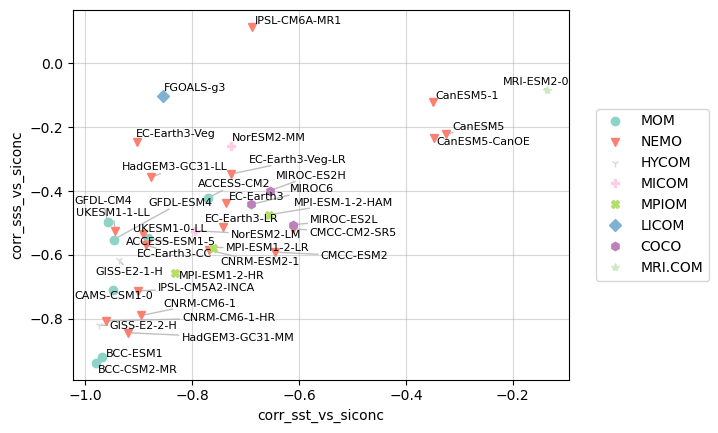

In [28]:
# corr_sst_vs_siconc = []
# corr_sss_vs_siconc = []
# model_type = []
# names = []
# for i in range(0, len(datapd)):
#     name = datapd.at[i, 'source_id']    
#     print("{} {}".format(i,name))
#     if not ispickleexists(name, '../../SO_data/data_sst/'):
#         continue
#     sst = openpickle(name, '../../SO_data/data_sst/')
#     if 'tos' in sst:
#         dssst = sst.tos
#     elif 'thetao' in sst:
#         dssst = sst.thetao

#     if not ispickleexists(name, '../../SO_data/data_sos/'):
#         continue
#     sss = openpickle(name, '../../SO_data/data_sos/')
#     if 'so' in sss:
#         dssos = sss.so
#     elif 'sos' in sss:
#         dssos = sss.sos

#     if ispickleexists(name, '../../SO_data/data_mlotst/'):
#         ds_mld = openpickle(name, '../../SO_data/data_mlotst/')
#         da_mld = ds_mld.mlotst
#     else:
#         ds_mld = openpickle(name, '../../SO_data/data_mld/')
#         da_mld = ds_mld.mld

#     conv_area = da_mld.where(da_mld>=2000).mean('time')

#     sst_conv = dssst.where(conv_area>0).mean((dssst.dims[-1], dssst.dims[-2]))
#     sss_conv = dssos.where(conv_area>0).mean((dssos.dims[-1], dssos.dims[-2]))

    
        
#     dssiconc = openpickle(name, '../../SO_data/data_siconc_w_area/')
#     try:
#         sic_conv = dssiconc.siconc.where(conv_area>0).mean((dssiconc.siconc.dims[-1], dssiconc.siconc.dims[-2]))
#     except Exception as E:
#         print(E)
#         continue

#     if len(sst_conv.time) != len(sic_conv.time):
#         continue
#     if len(sss_conv.time) != len(sic_conv.time):
#         continue

#     corr_sst = scipy.stats.pearsonr(sst_conv, sic_conv)
#     corr_sss = scipy.stats.pearsonr(sss_conv, sic_conv)

#     if corr_sst[1] < 0.5:
#         if corr_sss[1] < 0.5:
#             corr_sst_vs_siconc.append(corr_sst[0])
#             corr_sss_vs_siconc.append(corr_sss[0])
#             model_type.append(datapd.at[i, 'type'])
#             names.append(name)
            

    

    # dssst_south = dssst.where(sst.newlat<=-55).mean()
    # dssiconc_south = dssiconc.siconc.where(dssiconc.newlat <= -55).mean()
    
    # sst_means.append(dssst_south.values.item())
    # siconc_means.append(dssiconc_south.values.item())


df_plot = pd.DataFrame({
    'x': corr_sst_vs_siconc,
    'y': corr_sss_vs_siconc,
    'name': names,
    'type': model_type
})


marker_list = ['o','v','1','P','X','D','h','*','s','^','.']

fig, ax = plt.subplots()
# ax.axvline(c='grey', lw=1)
# ax.axhline(c='grey', lw=1)
cc = 0
for mtype in df_plot['type'].unique():
    plotdata_df = df_plot.loc[df_plot['type'] == mtype]
    ax.plot(plotdata_df.x, plotdata_df.y, 
            marker=marker_list[cc], 
            markeredgecolor = color_dict[mtype],
            markerfacecolor = color_dict[mtype],
            linestyle='', ms=6, label=mtype)
    cc += 1

texts=[]
for ind in df_plot.index:
    if df_plot['type'][ind] == 'MOM':
        texts+=[ax.text(df_plot['x'][ind], df_plot['y'][ind], df_plot['name'][ind], fontsize = 8)] # for adjustText
    else:
        if df_plot['y'][ind]<=100:
            texts+=[ax.text(df_plot['x'][ind], df_plot['y'][ind], df_plot['name'][ind], fontsize = 8)] # for adjustText

adjust_text(texts, df_plot.x.values, df_plot.y.values, ax=ax, # avoid_self=True, #force_explode = (0.2, 0.2),
            time_lim=1, #Give it 1 second instead of 0.1 sec to arrange such dense labels
            arrowprops=dict(arrowstyle='-', color='gray', alpha=.5))

# ax.set_xlim([33, 35])
# ax.set_ylim([60, 100])
# ax.set_aspect('equal', adjustable='box')

# ax.set_xticks(np.linspace(0,8,5), minor=False) # only the 50% is major
# ax.set_xticks(np.linspace(-1,8,10), minor=True) # all 10th are minor
# ax.set_yticks(np.linspace(0,8,5), minor=False) # only the 50% is major
# ax.set_yticks(np.linspace(-1,8,10), minor=True) # all 10th are minor
ax.grid(which='both', axis='both',alpha=.5) # draw grid
ax.set_xlabel("corr_sst_vs_siconc")
ax.set_ylabel("corr_sss_vs_siconc")
ax.legend(bbox_to_anchor=(1.04, 0.5), loc="center left")
# ax.legend(loc="upper left")


In [24]:
corr_sst[1]

0.0

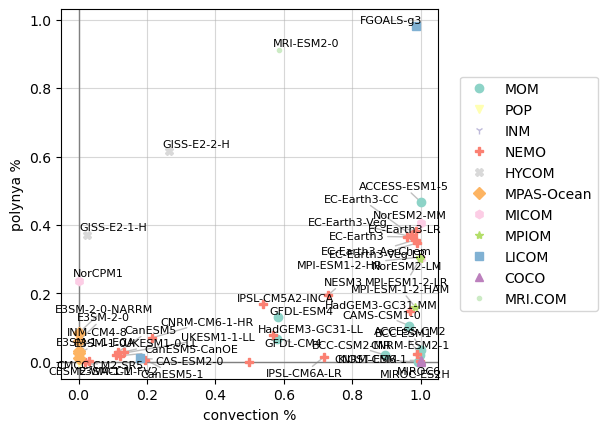

In [18]:
polynya_percents = []
conv_percents = []
model_type = []
names = []
for i in range(0, len(datapd)):
    name = datapd.at[i, 'source_id']    
    if ispickleexists(name, '../../SO_data/data_mlotst/'):
        datamld = openpickle(name, '../../SO_data/data_mlotst/')
        damld = datamld.mlotst
    else:
        datamld = openpickle(name, '../../SO_data/data_mld/')
        damld = datamld.mld


    area_c = datamld.areacello.where(damld>2000).sum(dim = datamld.areacello.dims)/1e12

    c_percent = len(area_c.where(area_c>0, drop=True))/len(area_c.time)
    
    
    path_polynya = '../../SO_data/data_polynya_max_mean/' + name + '_meannot0_*.pickle'
    newpath = glob.glob(path_polynya)[0]
    dsmasked = pd.read_pickle(newpath)
    dssiconc = openpickle(name, '../../SO_data/data_siconc_w_area/')
    
    area_p = dssiconc.areacello.where(dsmasked>0).sum(dim = dssiconc.areacello.dims)/1e12
    p_percent = len(area_p.where(area_p>0, drop=True))/len(area_p.time)

    # path_polynya = '../../SO_data/data_polynya_max_mean/' + name + '_meannot0_*.pickle'
    # newpath = glob.glob(path_polynya)[0]
    # dsmasked = pd.read_pickle(newpath)
    # dssiconc = openpickle(name, '../../SO_data/data_siconc_w_area/')
    # area_p = dssiconc.areacello.where(dsmasked>0)
    
    conv_percents.append(c_percent)
    polynya_percents.append(p_percent)
    model_type.append(datapd.at[i, 'type'])
    names.append(name)




df_plot = pd.DataFrame({
    'y': polynya_percents,
    'x': conv_percents,
    'name': names,
    'type': model_type
})


marker_list = ['o','v','1','P','X','D','h','*','s','^','.']

fig, ax = plt.subplots()
ax.axvline(c='grey', lw=1)
ax.axhline(c='grey', lw=1)
cc = 0
for mtype in df_plot['type'].unique():
    plotdata_df = df_plot.loc[df_plot['type'] == mtype]
    ax.plot(plotdata_df.x, plotdata_df.y, 
            marker=marker_list[cc], 
            markeredgecolor = color_dict[mtype],
            markerfacecolor = color_dict[mtype],
            linestyle='', ms=6, label=mtype)
    cc += 1

texts=[]
for ind in df_plot.index:
    if df_plot['type'][ind] == 'MOM':
        texts+=[ax.text(df_plot['x'][ind], df_plot['y'][ind], df_plot['name'][ind], fontsize = 8)] # for adjustText
    else:
        if df_plot['y'][ind]>0:
            texts+=[ax.text(df_plot['x'][ind], df_plot['y'][ind], df_plot['name'][ind], fontsize = 8)] # for adjustText

adjust_text(texts, df_plot.x.values, df_plot.y.values, ax=ax, # avoid_self=True, #force_explode = (0.2, 0.2),
            time_lim=1, #Give it 1 second instead of 0.1 sec to arrange such dense labels
            arrowprops=dict(arrowstyle='-', color='gray', alpha=.5))

# ax.set_xlim([-1, 8])
# ax.set_ylim([-1, 8])
ax.set_aspect('equal', adjustable='box')

# ax.set_xticks(np.linspace(0,8,5), minor=False) # only the 50% is major
# ax.set_xticks(np.linspace(-1,8,10), minor=True) # all 10th are minor
# ax.set_yticks(np.linspace(0,8,5), minor=False) # only the 50% is major
# ax.set_yticks(np.linspace(-1,8,10), minor=True) # all 10th are minor
ax.grid(which='both', axis='both',alpha=.5) # draw grid
ax.set_xlabel("convection %")
ax.set_ylabel("polynya %")
ax.legend(bbox_to_anchor=(1.04, 0.5), loc="center left")
# ax.legend(loc="upper left")


0 CAMS-CSM1-0
1 BCC-CSM2-MR
2 BCC-ESM1
3 KIOST-ESM
4 ACCESS-ESM1-5
5 ACCESS-CM2
6 GFDL-CM4
7 GFDL-ESM4
8 TaiESM1
9 SAM0-UNICON
10 CIESM
11 CESM2
12 CESM2-FV2
Unable to allocate 1.02 TiB for an array with shape (500, 74, 320, 74, 320) and data type float32
13 CESM2-WACCM
14 CESM2-WACCM-FV2
15 INM-CM4-8
16 NESM3
Unable to allocate 1.37 TiB for an array with shape (500, 88, 362, 74, 320) and data type float32
17 CanESM5
18 CanESM5-1
19 CanESM5-CanOE
20 CMCC-CM2-SR5
21 CMCC-ESM2
22 EC-Earth3
23 EC-Earth3-CC
24 EC-Earth3-LR
25 EC-Earth3-Veg
26 EC-Earth3-Veg-LR
27 EC-Earth3-AerChem
28 CNRM-CM6-1
29 CNRM-CM6-1-HR
30 CNRM-ESM2-1
31 HadGEM3-GC31-LL
32 HadGEM3-GC31-MM
33 UKESM1-0-LL
34 UKESM1-1-LL
35 IPSL-CM5A2-INCA
36 IPSL-CM6A-LR
37 IPSL-CM6A-MR1
38 GISS-E2-1-H
39 GISS-E2-2-H
40 E3SM-1-0
41 E3SM-1-1
42 E3SM-1-1-ECA
43 E3SM-2-0
44 E3SM-2-0-NARRM
45 NorCPM1
46 NorESM2-MM
47 NorESM2-LM
48 MPI-ESM-1-2-HAM
49 MPI-ESM1-2-HR
50 MPI-ESM1-2-LR
51 CAS-ESM2-0
52 FGOALS-g3
53 MIROC6
54 MIROC-ES2L
55 MIROC

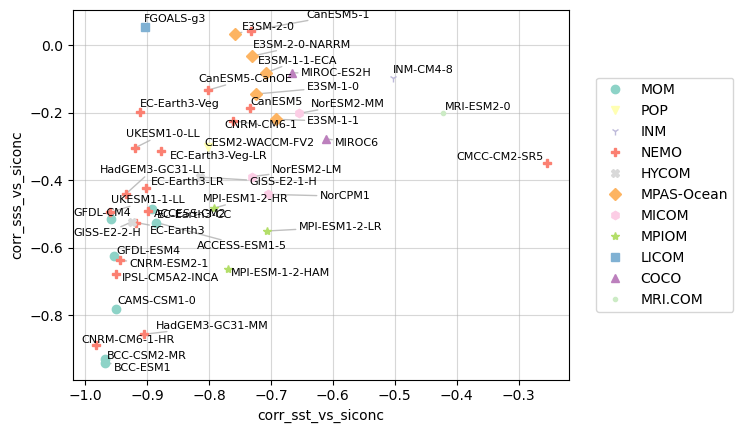

In [32]:
corr_sst_vs_siconc = []
corr_sss_vs_siconc = []
model_type = []
names = []
for i in range(0, len(datapd)):
    name = datapd.at[i, 'source_id']    
    print("{} {}".format(i,name))
    if not ispickleexists(name, '../../SO_data/data_sst/'):
        continue
    sst = openpickle(name, '../../SO_data/data_sst/')
    if 'tos' in sst:
        dssst = sst.tos
    elif 'thetao' in sst:
        dssst = sst.thetao

    if not ispickleexists(name, '../../SO_data/data_sos/'):
        continue
    sss = openpickle(name, '../../SO_data/data_sos/')
    if 'so' in sss:
        dssos = sss.so
    elif 'sos' in sss:
        dssos = sss.sos

    # if ispickleexists(name, '../../SO_data/data_mlotst/'):
    #     ds_mld = openpickle(name, '../../SO_data/data_mlotst/')
    #     da_mld = ds_mld.mlotst
    # else:
    #     ds_mld = openpickle(name, '../../SO_data/data_mld/')
    #     da_mld = ds_mld.mld

    # conv_area = da_mld.where(da_mld>=2000).mean('time')

    # sst_conv = dssst.where(conv_area>0).mean((dssst.dims[-1], dssst.dims[-2]))
    # sss_conv = dssos.where(conv_area>0).mean((dssos.dims[-1], dssos.dims[-2]))

        
    dssiconc = openpickle(name, '../../SO_data/data_siconc_w_area/')

    path_polynya = '../../SO_data/data_polynya_max_mean/' + name + '_meannot0_*.pickle'
    newpath = glob.glob(path_polynya)[0]
    dsmasked = pd.read_pickle(newpath)
    polynya_region = dsmasked.where(dsmasked>0).mean('time')

    sic_poly = dssiconc.siconc.where(polynya_region>0).mean((dssiconc.siconc.dims[-1],dssiconc.siconc.dims[-2]))
    
    try:
        sst_poly = dssst.where(polynya_region>0).mean((dssst.dims[-1], dssst.dims[-2]))
    except Exception as E:
        print(E)
        continue

    try:
        sss_poly = dssos.where(polynya_region>0).mean((dssos.dims[-1], dssos.dims[-2]))
    except Exception as E:
        print(E)
        continue

    if len(sst_poly.time) != len(sic_poly.time):
        continue
    if len(sss_poly.time) != len(sic_poly.time):
        continue

    corr_sst = scipy.stats.pearsonr(sst_poly, sic_poly)
    corr_sss = scipy.stats.pearsonr(sss_poly, sic_poly)

    if corr_sst[1] < 0.5:
        if corr_sss[1] < 0.5:
            corr_sst_vs_siconc.append(corr_sst[0])
            corr_sss_vs_siconc.append(corr_sss[0])
            model_type.append(datapd.at[i, 'type'])
            names.append(name)
            
    

    # dssst_south = dssst.where(sst.newlat<=-55).mean()
    # dssiconc_south = dssiconc.siconc.where(dssiconc.newlat <= -55).mean()
    
    # sst_means.append(dssst_south.values.item())
    # siconc_means.append(dssiconc_south.values.item())


df_plot = pd.DataFrame({
    'x': corr_sst_vs_siconc,
    'y': corr_sss_vs_siconc,
    'name': names,
    'type': model_type
})


marker_list = ['o','v','1','P','X','D','h','*','s','^','.']

fig, ax = plt.subplots()
# ax.axvline(c='grey', lw=1)
# ax.axhline(c='grey', lw=1)
cc = 0
for mtype in df_plot['type'].unique():
    plotdata_df = df_plot.loc[df_plot['type'] == mtype]
    ax.plot(plotdata_df.x, plotdata_df.y, 
            marker=marker_list[cc], 
            markeredgecolor = color_dict[mtype],
            markerfacecolor = color_dict[mtype],
            linestyle='', ms=6, label=mtype)
    cc += 1

texts=[]
for ind in df_plot.index:
    if df_plot['type'][ind] == 'MOM':
        texts+=[ax.text(df_plot['x'][ind], df_plot['y'][ind], df_plot['name'][ind], fontsize = 8)] # for adjustText
    else:
        if df_plot['y'][ind]<=100:
            texts+=[ax.text(df_plot['x'][ind], df_plot['y'][ind], df_plot['name'][ind], fontsize = 8)] # for adjustText

adjust_text(texts, df_plot.x.values, df_plot.y.values, ax=ax, # avoid_self=True, #force_explode = (0.2, 0.2),
            time_lim=1, #Give it 1 second instead of 0.1 sec to arrange such dense labels
            arrowprops=dict(arrowstyle='-', color='gray', alpha=.5))

# ax.set_xlim([33, 35])
# ax.set_ylim([60, 100])
# ax.set_aspect('equal', adjustable='box')

# ax.set_xticks(np.linspace(0,8,5), minor=False) # only the 50% is major
# ax.set_xticks(np.linspace(-1,8,10), minor=True) # all 10th are minor
# ax.set_yticks(np.linspace(0,8,5), minor=False) # only the 50% is major
# ax.set_yticks(np.linspace(-1,8,10), minor=True) # all 10th are minor
ax.grid(which='both', axis='both',alpha=.5) # draw grid
ax.set_xlabel("corr_sst_vs_siconc")
ax.set_ylabel("corr_sss_vs_siconc")
ax.legend(bbox_to_anchor=(1.04, 0.5), loc="center left")
# ax.legend(loc="upper left")


In [ ]:
polynya_percents = []
conv_percents = []
model_type = []
names = []
for i in range(0, len(datapd)):
    name = datapd.at[i, 'source_id']    
    if ispickleexists(name, '../../SO_data/data_mlotst/'):
        datamld = openpickle(name, '../../SO_data/data_mlotst/')
        damld = datamld.mlotst
    else:
        datamld = openpickle(name, '../../SO_data/data_mld/')
        damld = datamld.mld


    area_c = datamld.areacello.where(damld>2000).sum(dim = datamld.areacello.dims)/1e12

    c_percent = len(area_c.where(area_c>0, drop=True))/len(area_c.time)
    
    
    path_polynya = '../../SO_data/data_polynya_max_mean/' + name + '_meannot0_*.pickle'
    newpath = glob.glob(path_polynya)[0]
    dsmasked = pd.read_pickle(newpath)
    dssiconc = openpickle(name, '../../SO_data/data_siconc_w_area/')
    
    area_p = dssiconc.areacello.where(dsmasked>0).sum(dim = dssiconc.areacello.dims)/1e12
    p_percent = len(area_p.where(area_p>0, drop=True))/len(area_p.time)

    # path_polynya = '../../SO_data/data_polynya_max_mean/' + name + '_meannot0_*.pickle'
    # newpath = glob.glob(path_polynya)[0]
    # dsmasked = pd.read_pickle(newpath)
    # dssiconc = openpickle(name, '../../SO_data/data_siconc_w_area/')
    # area_p = dssiconc.areacello.where(dsmasked>0)
    
    conv_percents.append(c_percent)
    polynya_percents.append(p_percent)
    model_type.append(datapd.at[i, 'type'])
    names.append(name)


df_plot = pd.DataFrame({
    'y': polynya_percents,
    'x': conv_percents,
    'name': names,
    'type': model_type
})


marker_list = ['o','v','1','P','X','D','h','*','s','^','.']

fig, ax = plt.subplots()
ax.axvline(c='grey', lw=1)
ax.axhline(c='grey', lw=1)
cc = 0
for mtype in df_plot['type'].unique():
    plotdata_df = df_plot.loc[df_plot['type'] == mtype]
    ax.plot(plotdata_df.x, plotdata_df.y, 
            marker=marker_list[cc], 
            markeredgecolor = color_dict[mtype],
            markerfacecolor = color_dict[mtype],
            linestyle='', ms=6, label=mtype)
    cc += 1

texts=[]
for ind in df_plot.index:
    if df_plot['type'][ind] == 'MOM':
        texts+=[ax.text(df_plot['x'][ind], df_plot['y'][ind], df_plot['name'][ind], fontsize = 8)] # for adjustText
    else:
        if df_plot['y'][ind]>0:
            texts+=[ax.text(df_plot['x'][ind], df_plot['y'][ind], df_plot['name'][ind], fontsize = 8)] # for adjustText

adjust_text(texts, df_plot.x.values, df_plot.y.values, ax=ax, # avoid_self=True, #force_explode = (0.2, 0.2),
            time_lim=1, #Give it 1 second instead of 0.1 sec to arrange such dense labels
            arrowprops=dict(arrowstyle='-', color='gray', alpha=.5))

# ax.set_xlim([-1, 8])
# ax.set_ylim([-1, 8])
ax.set_aspect('equal', adjustable='box')

# ax.set_xticks(np.linspace(0,8,5), minor=False) # only the 50% is major
# ax.set_xticks(np.linspace(-1,8,10), minor=True) # all 10th are minor
# ax.set_yticks(np.linspace(0,8,5), minor=False) # only the 50% is major
# ax.set_yticks(np.linspace(-1,8,10), minor=True) # all 10th are minor
ax.grid(which='both', axis='both',alpha=.5) # draw grid
ax.set_xlabel("convection %")
ax.set_ylabel("polynya %")
ax.legend(bbox_to_anchor=(1.04, 0.5), loc="center left")
# ax.legend(loc="upper left")
